<a href="https://colab.research.google.com/github/MariaKrakowiak/Car_price_analysis_and_prediction/blob/main/Car_price_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data context**
This dataset contains of 19237 cars with their detailed characteristics and prices.

*(source: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)*

# **Data content**
The csv file contains of 18 fields. The names of each field are as below:


*   ID
*   Price
*   Levy
*   Manufacturer
*   Model
*   Prod. year
*   Category
*   Leather interior
*   Fuel type
*   Engine volume
*   Mileage
*   Cylinders
*   Gear box type
*   Drive wheels
*   Doors
*   Wheel
*   Color
*   Airbags

*(source: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)*










# **Imports**

In [3]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import cm
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.dtypes import CategoricalDtype

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from joblib import dump, load

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Load the data**

In [5]:
df = pd.read_csv("gdrive/My Drive/car_price_prediction.csv")

# **EDA**

In [6]:
# First 5 rows of data
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [7]:
# Data types
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [8]:
# Unique value in each column
print(df.nunique())

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64


In [9]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
# Count values in Levy column
print(df['Levy'].value_counts())

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64


In [11]:
# Replace '-' values by 0 in Levy column
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'].value_counts()

0       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [12]:
# Replace 0 values by mean in Levy column
df['Levy'] = pd.to_numeric(df['Levy'])
mean_value_levy = round(df['Levy'].mean())
df['Levy'] = df['Levy'].replace(0, mean_value_levy)

In [13]:
df['Levy'].value_counts()

633     5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [14]:
# Count values in Engine volume column
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [15]:
# Function for changing the format of values in columns
def new_format(data, column, start, stop):
  new_column = []
  for i in range(len(data)):
    new_column.append(data[column][i][start:stop])
  data[column] = new_column
  data[column] = pd.to_numeric(data[column])

In [16]:
# Call function for Engine volume column
new_format(df, 'Engine volume', 0, 3)

In [17]:
df['Engine volume'].value_counts()

2.0    4324
2.5    2370
1.8    1937
1.6    1578
1.5    1393
       ... 
3.1       1
7.3       1
0.5       1
6.8       1
5.8       1
Name: Engine volume, Length: 65, dtype: int64

In [18]:
# Count values in Mileage column
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [19]:
# Call function for Mileage column
new_format(df, 'Mileage', 0, -3)
df['Mileage'].value_counts()

0         721
200000    183
150000    161
160000    120
100000    119
         ... 
63083       1
28750       1
25077       1
77452       1
186923      1
Name: Mileage, Length: 7687, dtype: int64

In [20]:
# Count values in Doors column
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [21]:
# Call function for Doors column
new_format(df, 'Doors', 1, 2)
df['Doors'].value_counts()

4    18332
2      777
5      128
Name: Doors, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [23]:
# Basic statistics for numerical column
df.describe()

ID         Price          Levy    Prod. year  Engine volume  \
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000   19237.000000   
mean   4.557654e+07  1.855593e+04    824.004834   2010.912824       2.307990   
std    9.365914e+05  1.905813e+05    405.724883      5.668673       0.877805   
min    2.074688e+07  1.000000e+00     87.000000   1939.000000       0.000000   
25%    4.569837e+07  5.331000e+03    633.000000   2009.000000       1.800000   
50%    4.577231e+07  1.317200e+04    642.000000   2012.000000       2.000000   
75%    4.580204e+07  2.207500e+04    917.000000   2015.000000       2.500000   
max    4.581665e+07  2.630750e+07  11714.000000   2020.000000      20.000000   

            Mileage     Cylinders         Doors       Airbags  
count  1.923700e+04  19237.000000  19237.000000  19237.000000  
mean   1.532236e+06      4.582991      3.925872      6.582627  
std    4.840387e+07      1.199933      0.403399      4.320168  
min    0.000000e+00      1.000000      2.000000      0.000000  
25%    7.013900e+04      4.000000      4.000000      4.000000  
50%    1.260000e+05      4.000000      4.000000      6.000000  
75%    1.888880e+05      4.000000      4.000000     12.000000  
max    2.147484e+09     16.000000      5.000000     16.000000

In [24]:
# Amount on null values in all columns
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [25]:
# Amount on nan values in all columns
df.isna().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
19232    0
19233    0
19234    0
19235    0
19236    0
Length: 19237, dtype: int64

In [26]:
# Check ID column for duplicates
df['ID'].duplicated().sum()

313

In [27]:
# Unique values in each column
pd.Series({c: df[c].unique() for c in df})

ID                  [45654403, 44731507, 45774419, 45769185, 45809...
Price               [13328, 16621, 8467, 3607, 11726, 39493, 1803,...
Levy                [1399, 1018, 633, 862, 446, 891, 761, 751, 394...
Manufacturer        [LEXUS, CHEVROLET, HONDA, FORD, HYUNDAI, TOYOT...
Model               [RX 450, Equinox, FIT, Escape, Santa FE, Prius...
Prod. year          [2010, 2011, 2006, 2014, 2016, 2013, 2007, 199...
Category            [Jeep, Hatchback, Sedan, Microbus, Goods wagon...
Leather interior                                            [Yes, No]
Fuel type           [Hybrid, Petrol, Diesel, CNG, Plug-in Hybrid, ...
Engine volume       [3.5, 3.0, 1.3, 2.5, 2.0, 1.8, 2.4, 4.0, 1.6, ...
Mileage             [186005, 192000, 200000, 168966, 91901, 160931...
Cylinders           [6.0, 4.0, 8.0, 1.0, 12.0, 3.0, 2.0, 16.0, 5.0...
Gear box type                [Automatic, Tiptronic, Variator, Manual]
Drive wheels                                       [4x4, Front, Rear]
Doors               

In [28]:
# Amount of unique values in each column
pd.Series({c: len(df[c].unique()) for c in df})

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume          65
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [29]:
# Statistics by Color
by_color = df.groupby(['Color']).size()
display(by_color)

Color
Beige             134
Black            5033
Blue             1396
Brown             187
Carnelian red     179
Golden            145
Green             322
Grey             2375
Orange            253
Pink               26
Purple             39
Red               639
Silver           3792
Sky blue          122
White            4489
Yellow            106
dtype: int64

In [30]:
# Statistics by Category
by_category = df.groupby(['Category']).size()
display(by_category)

Category
Cabriolet        36
Coupe           532
Goods wagon     233
Hatchback      2847
Jeep           5473
Limousine        11
Microbus        306
Minivan         647
Pickup           52
Sedan          8736
Universal       364
dtype: int64

In [31]:
# Statistics by Fuel type
by_fuel = df.groupby(['Fuel type']).size()
display(by_fuel)

Fuel type
CNG                 494
Diesel             4036
Hybrid             3578
Hydrogen              1
LPG                 892
Petrol            10150
Plug-in Hybrid       86
dtype: int64

In [32]:
# Statistics by Cylinders
by_cylinders = df.groupby(['Cylinders']).size()
display(by_cylinders)

Cylinders
1.0        38
2.0        42
3.0       107
4.0     14367
5.0       169
6.0      3462
7.0         4
8.0       991
9.0         1
10.0       12
12.0       38
14.0        1
16.0        5
dtype: int64

In [33]:
# Statistics by Doors
by_doors = df.groupby(['Doors']).size()
display(by_doors)

Doors
2      777
4    18332
5      128
dtype: int64

In [34]:
# Statistics by Gear box type
by_gear = df.groupby(['Gear box type']).size()
display(by_gear)

Gear box type
Automatic    13514
Manual        1875
Tiptronic     3102
Variator       746
dtype: int64

In [35]:
# Drop ID column
df = df.drop('ID', axis = 1)
df.head()

Price  Levy Manufacturer    Model  Prod. year   Category Leather interior  \
0  13328  1399        LEXUS   RX 450        2010       Jeep              Yes   
1  16621  1018    CHEVROLET  Equinox        2011       Jeep               No   
2   8467   633        HONDA      FIT        2006  Hatchback               No   
3   3607   862         FORD   Escape        2011       Jeep              Yes   
4  11726   446        HONDA      FIT        2014  Hatchback              Yes   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5   186005        6.0     Automatic          4x4   
1    Petrol            3.0   192000        6.0     Tiptronic          4x4   
2    Petrol            1.3   200000        4.0      Variator        Front   
3    Hybrid            2.5   168966        4.0     Automatic          4x4   
4    Petrol            1.3    91901        4.0     Automatic        Front   

   Doors             Wheel   Color  Airbags  
0      4        Left wheel  Silver       12  
1      4        Left wheel   Black        8  
2      4  Right-hand drive   Black        2  
3      4        Left wheel   White        0  
4      4        Left wheel  Silver        4

<ipython-input-36-2d03c0bd4613>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  count_corr = df.corr()


<Axes: >

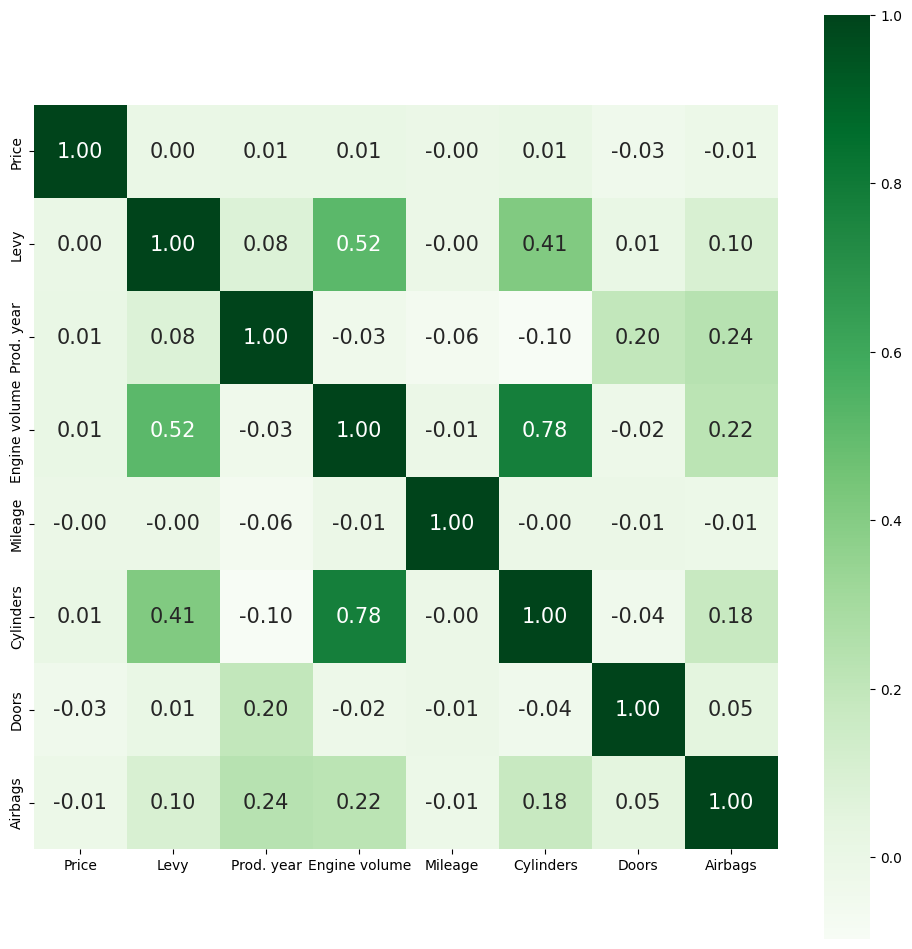

In [36]:
# Correlation matrix before transformations
plt.figure(figsize=(12,12))
count_corr = df.corr()
sns.heatmap(count_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

# **Visualization**

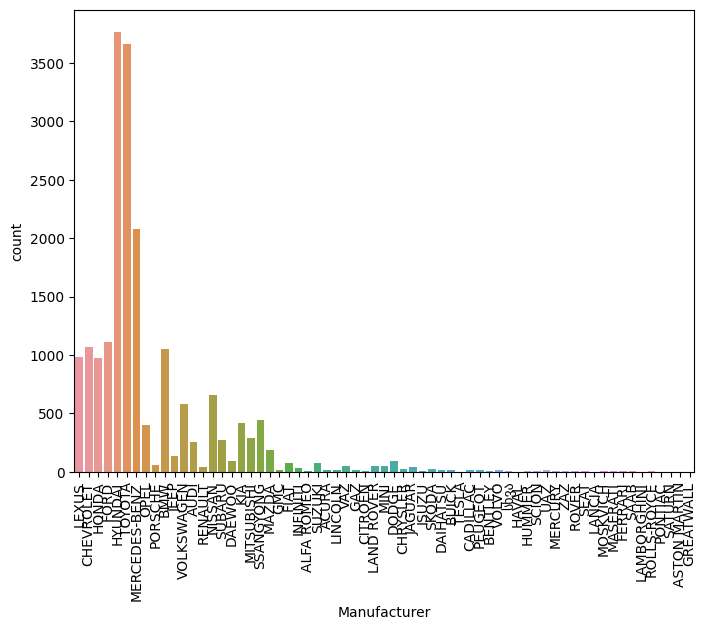

In [37]:
# Most cars are Mercedes-Benz, Toyota and Hyundai
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Manufacturer', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

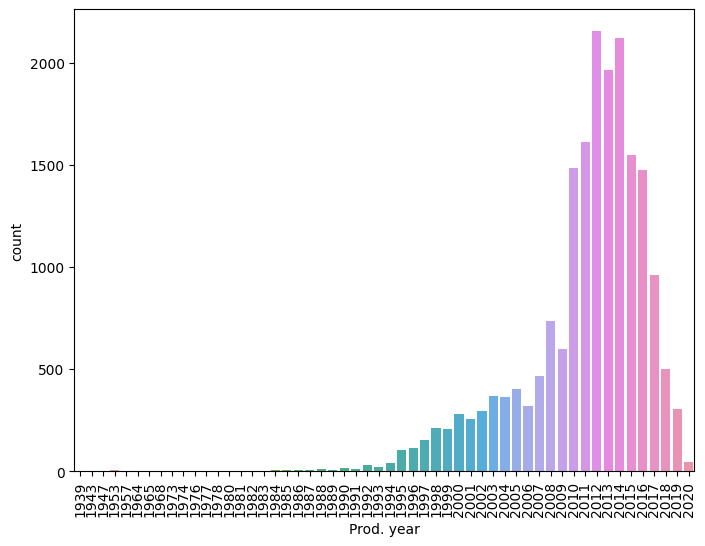

In [38]:
# Most of cars are new but there are some old ones
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Prod. year', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

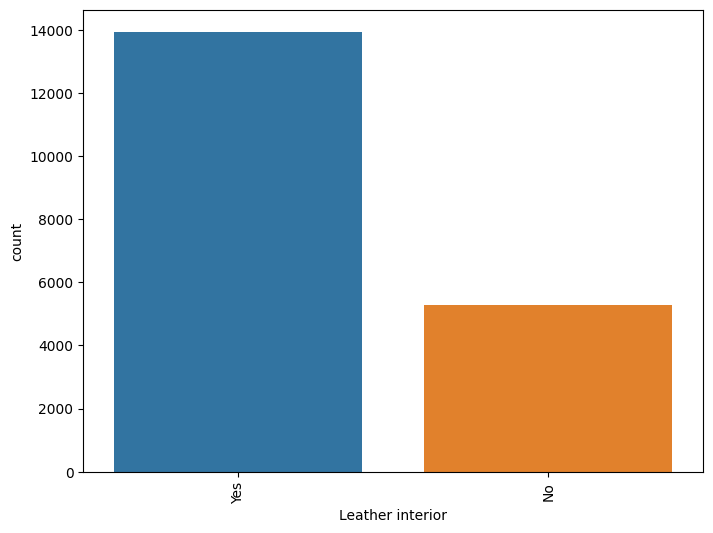

In [39]:
# Most of cars have leather interior
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Leather interior', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

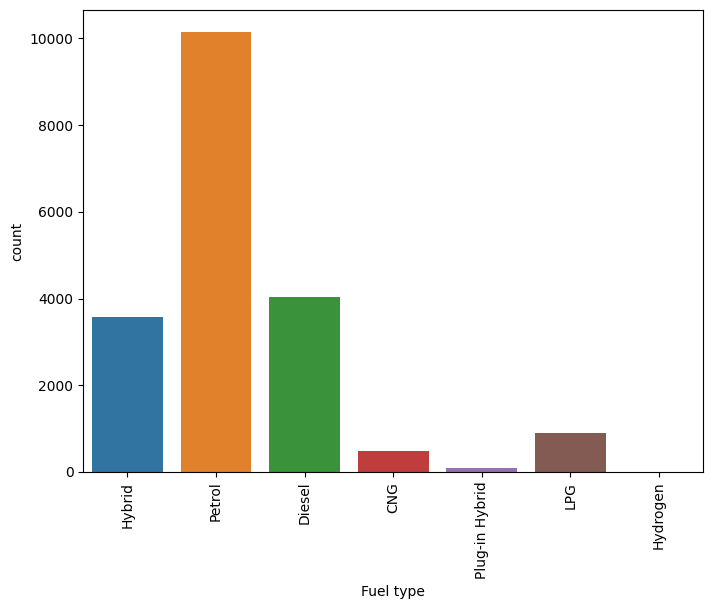

In [40]:
# Most of cars have Hybrid, Petrol or Diesel fuel
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Fuel type', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

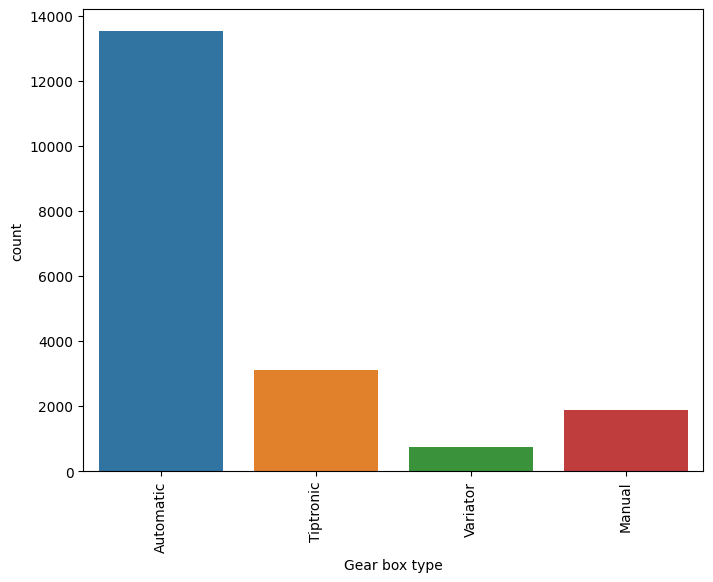

In [41]:
# Most of cars have Automatic gear box type
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Gear box type', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

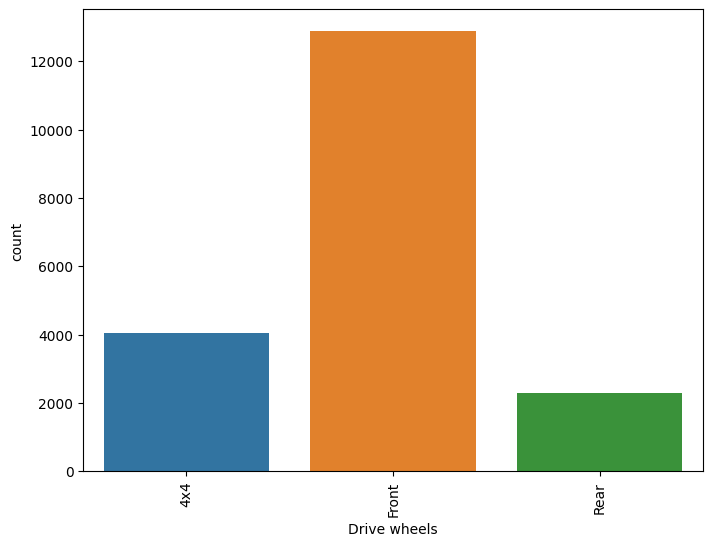

In [42]:
# Most of cars have front Drive wheels
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Drive wheels', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

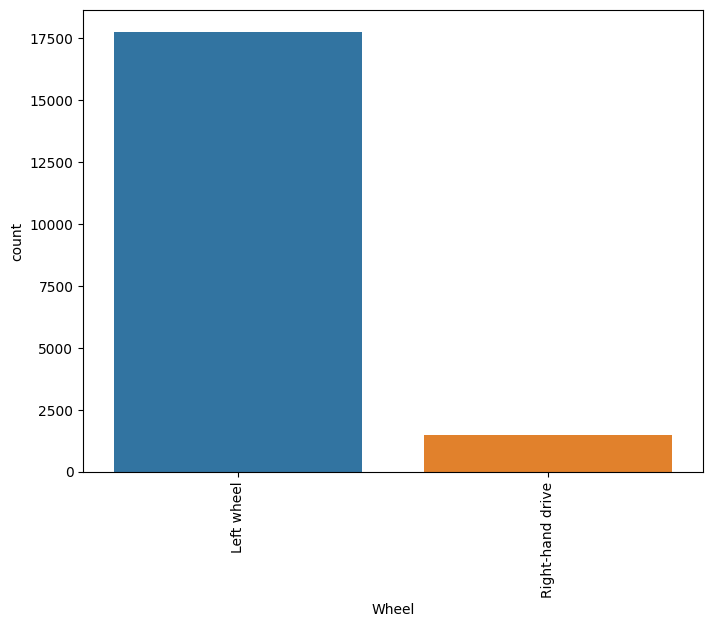

In [43]:
# Most of cars have left wheel
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Wheel', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

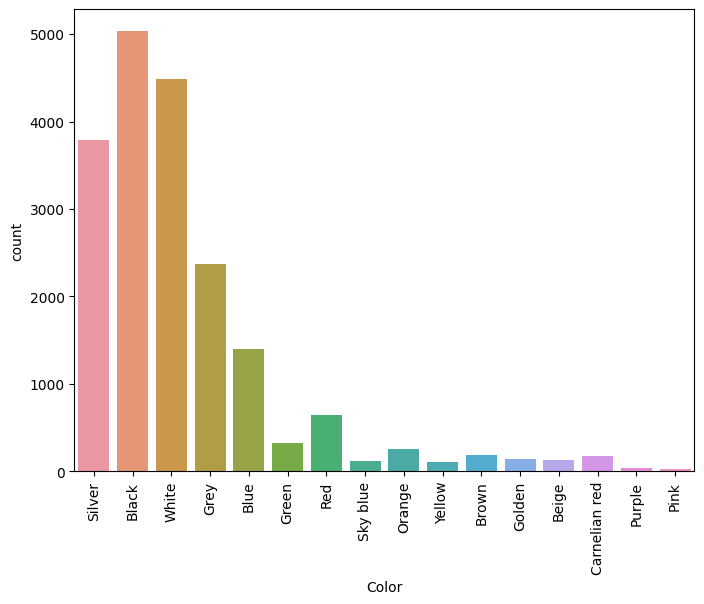

In [44]:
# Most cars are silver, black or white
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Color', data=df)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

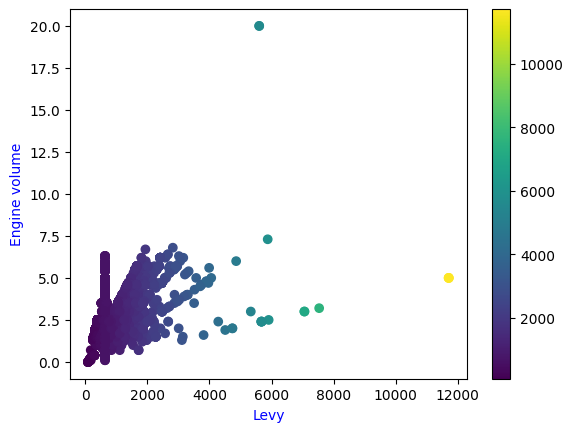

In [45]:
# Scatter plot between Levy and Engine volume columns
fig, ax = plt.subplots()
sc = ax.scatter(df['Levy'], df['Engine volume'], c=df['Levy'])
plt.xlabel('Levy', color='blue')
plt.ylabel('Engine volume', color='blue')
plt.colorbar(sc)
plt.show()

<Axes: xlabel='Cylinders', ylabel='Engine volume'>

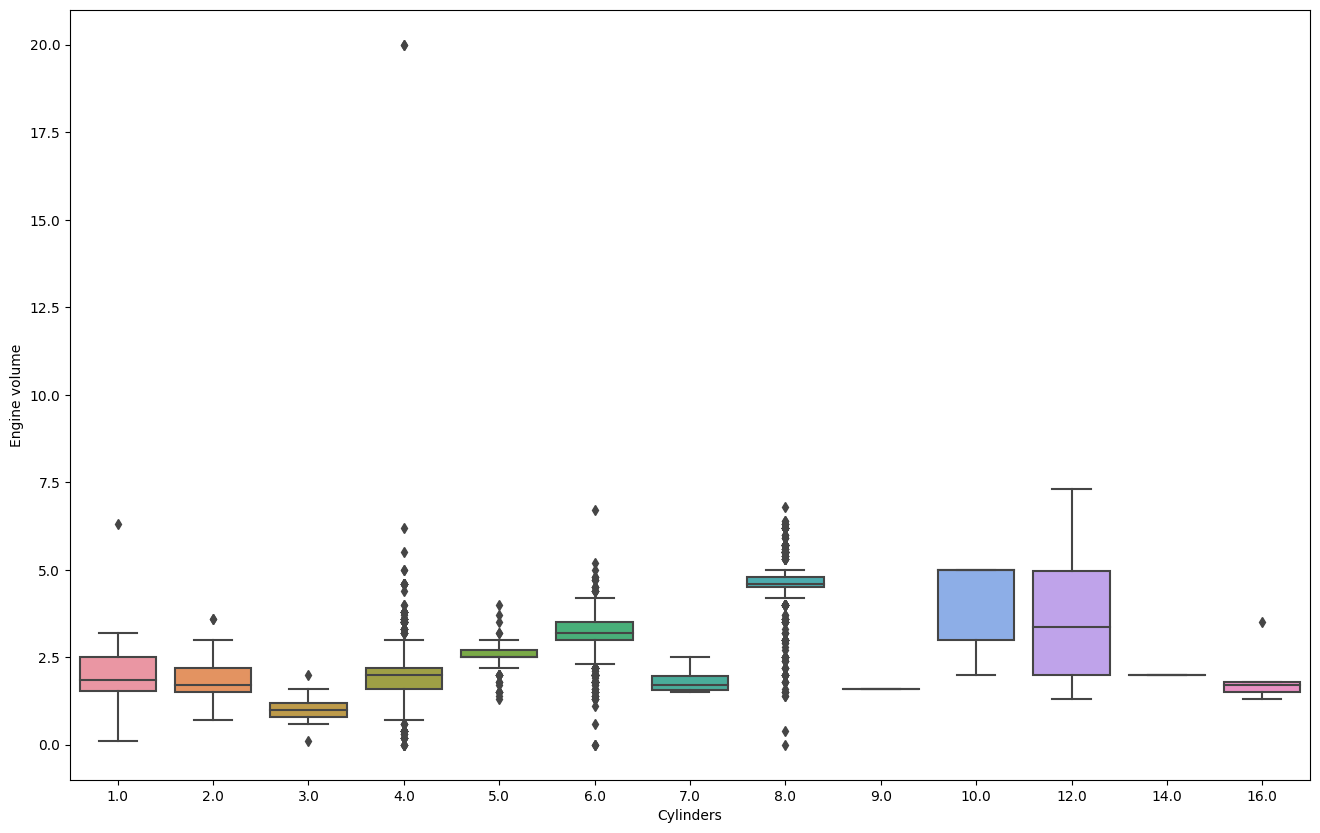

In [46]:
# Boxplot representing Cylinders and Engine volume relationship
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='Cylinders', y='Engine volume')

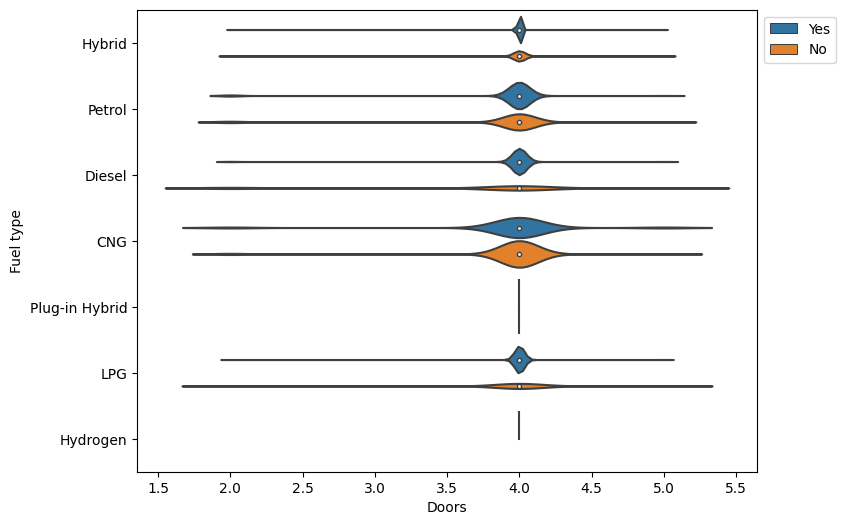

In [47]:
# Violinplot between Doors and Fuel type
plt.figure(figsize=(8,6))
v = sns.violinplot(x='Doors', y='Fuel type', data=df, hue='Leather interior')
plt.legend(loc=2, bbox_to_anchor=(1,1))

<Axes: xlabel='Engine volume', ylabel='Cylinders'>

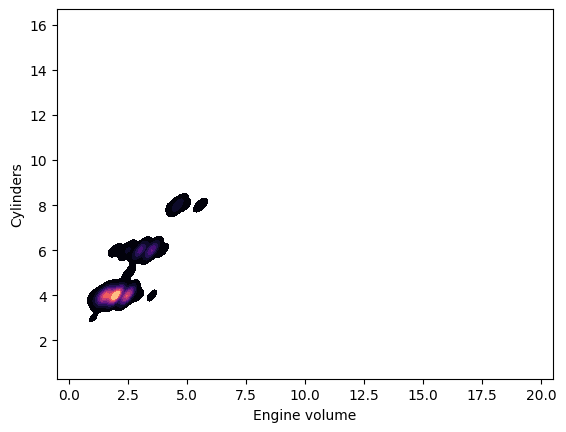

In [48]:
# Kdeplot for Engine volume and Cylinders
sns.kdeplot(x='Engine volume', y='Cylinders', data=df, fill=True, cmap='magma')

<Axes: xlabel='Levy', ylabel='Density'>

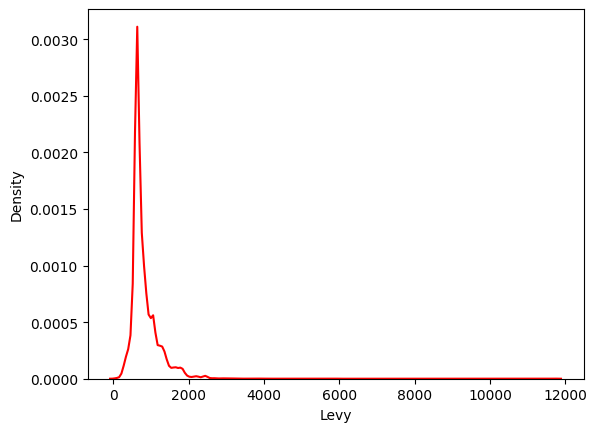

In [49]:
# Most cars have Levy between 0 nas 2000
sns.kdeplot(df['Levy'], color='r')

<Axes: xlabel='Airbags', ylabel='Density'>

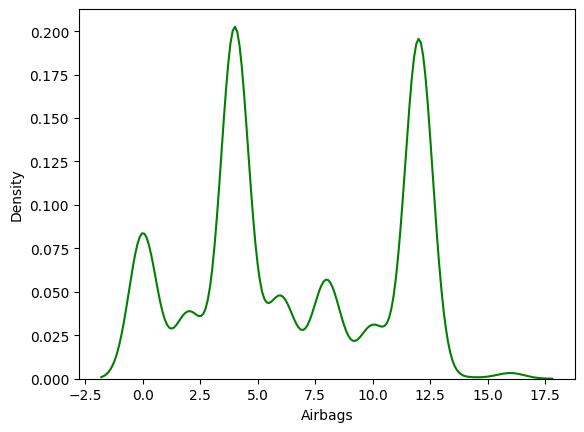

In [51]:
# Cars have huge variety of Airbags amount
sns.kdeplot(df['Airbags'], color='green')

<Axes: xlabel='Fuel type', ylabel='count'>

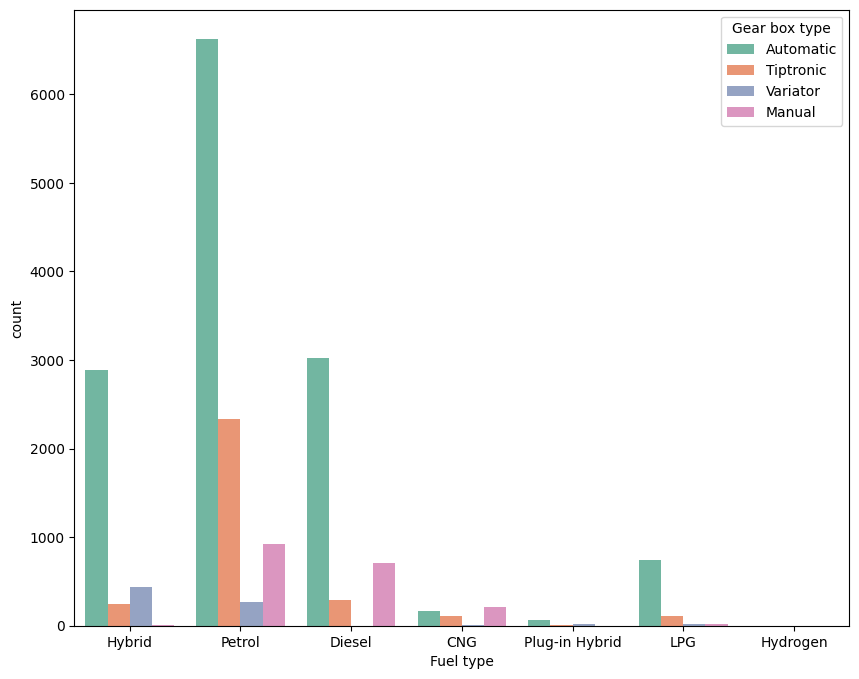

In [52]:
# Countplot of Gear box type and Fuel type
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Fuel type', hue='Gear box type', palette='Set2')

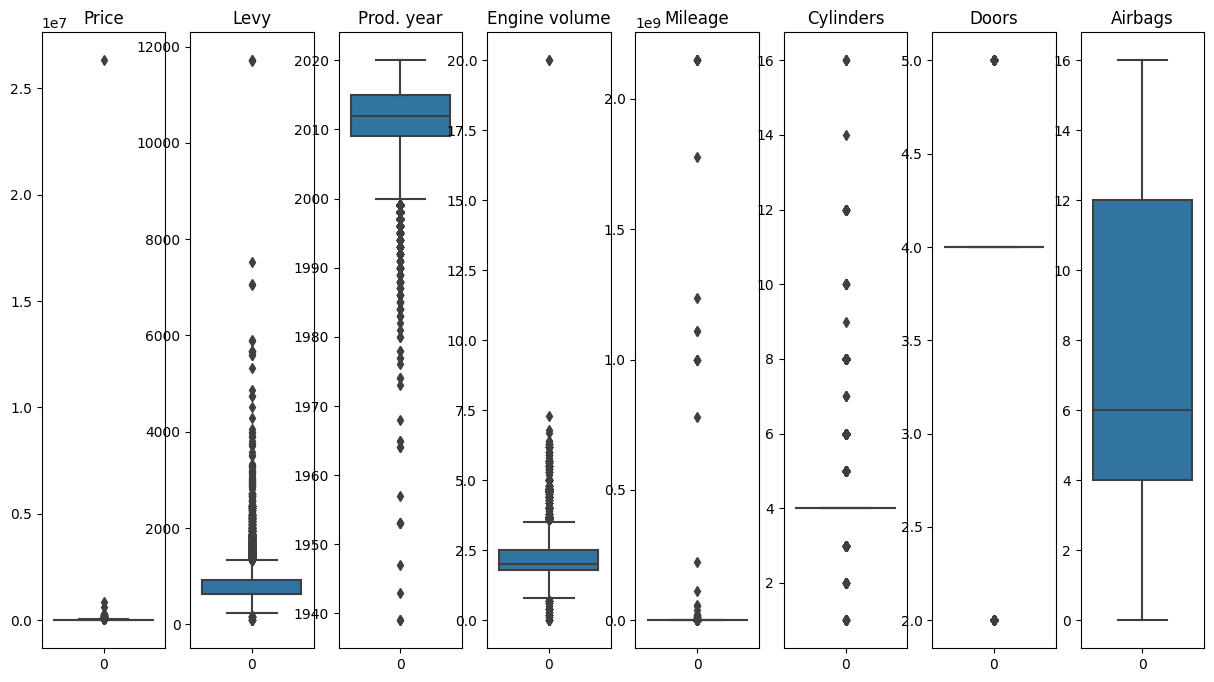

In [53]:
# Check outliers in data
def all_boxplots(df):
  num = []
  for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
      num.append(col)
  df_num = df[num]
  fig, axs = plt.subplots(figsize = (15, 8), ncols=8)
  for i in range(len(num)):
    sns.boxplot(df_num[df_num.columns[i]], ax=axs[i]).set_title(num[i])
all_boxplots(df)

# **Data preprocessing**

In [54]:
# Preparation for removing outliers, calculating quantiles and filtering data
q1 = df['Levy'].quantile(0.9)
q3 = df['Levy'].quantile(0.1)
print(q1)
print(q3)
filter1 = df['Levy'] > q1
filter2 = df['Levy'] < q3
fil = df.where(filter1 & filter2, inplace = False)
fil.dropna().sum(axis = 1)

1273.0
583.0


Series([], dtype: float64)

In [55]:
# Function for removing outliers from all columns depending on corresponding quantile value
def remove_outliers(dataframe):
  num = []
  for col in dataframe.columns:
    if np.issubdtype(dataframe[col].dtype, np.number):
        num.append(col)
    for i in range(len(num)):
      Q1 = dataframe[num[i]].quantile(0.05)
      Q3 = dataframe[num[i]].quantile(0.95)
      IQR = Q3- Q1
      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR
      outliers_low = (dataframe[num[i]] > Q1)
      outliers_up = (dataframe[num[i]] < Q3)
      dataframe[num[i]] = dataframe[num[i]].where(outliers_up & outliers_low, inplace = False)
    return dataframe
df1 = remove_outliers(df)

In [56]:
# Checking the amount of Nan values in all rows
df1.isna().sum(axis = 0)

Price               2098
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [57]:
# Droping rows with Nan values
df1 = df1.dropna(axis = 0)
print(len(df1))

17139


In [58]:
# Retrieving the columns which will be considered and setting independent/dependent variables
X = df1
y = df1['Price'].values

In [59]:
# OHE for columns: Leather interior, Fuel type, Gear box type, Drive wheels and Wheel
dummy_X = pd.get_dummies(X, columns = ['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel'])
dummy_X.head()

Price  Levy Manufacturer    Model  Prod. year   Category  Engine volume  \
0  13328.0  1399        LEXUS   RX 450        2010       Jeep            3.5   
1  16621.0  1018    CHEVROLET  Equinox        2011       Jeep            3.0   
2   8467.0   633        HONDA      FIT        2006  Hatchback            1.3   
3   3607.0   862         FORD   Escape        2011       Jeep            2.5   
4  11726.0   446        HONDA      FIT        2014  Hatchback            1.3   

   Mileage  Cylinders  Doors  ... Fuel type_Plug-in Hybrid  \
0   186005        6.0      4  ...                        0   
1   192000        6.0      4  ...                        0   
2   200000        4.0      4  ...                        0   
3   168966        4.0      4  ...                        0   
4    91901        4.0      4  ...                        0   

   Gear box type_Automatic  Gear box type_Manual  Gear box type_Tiptronic  \
0                        1                     0                        0   
1                        0                     0                        1   
2                        0                     0                        0   
3                        1                     0                        0   
4                        1                     0                        0   

   Gear box type_Variator  Drive wheels_4x4  Drive wheels_Front  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       1                 0                   1   
3                       0                 1                   0   
4                       0                 0                   1   

   Drive wheels_Rear  Wheel_Left wheel  Wheel_Right-hand drive  
0                  0                 1                       0  
1                  0                 1                       0  
2                  0                 0                       1  
3                  0                 1                       0  
4                  0                 1                       0  

[5 rows x 30 columns]

In [60]:
# TE for columns: Manufacturer, Model, Category and Color
mean_man_X = dummy_X.groupby('Manufacturer')['Price'].mean().to_dict()
mean_mod_X = dummy_X.groupby('Model')['Price'].mean().to_dict()
mean_cat_X = dummy_X.groupby('Category')['Price'].mean().to_dict()
mean_col_X = dummy_X.groupby('Color')['Price'].mean().to_dict()

In [61]:
# Replacing values in considered columns by mean for each
dummy_X['Manufacturer'] = dummy_X['Manufacturer'].map(mean_man_X)
dummy_X['Model'] = dummy_X['Model'].map(mean_mod_X)
dummy_X['Category'] = dummy_X['Category'].map(mean_cat_X)
dummy_X['Color'] = dummy_X['Color'].map(mean_col_X)

In [62]:
# Drop Price column from dummy_X
X_prepared = dummy_X.drop(columns = 'Price')

In [ ]:
# Checking if there are no missing values
X_prepared.isna().sum(axis = 0)

Levy                        0
Manufacturer                0
Model                       0
Prod. year                  0
Category                    0
Engine volume               0
Mileage                     0
Cylinders                   0
Doors                       0
Color                       0
Airbags                     0
Leather interior_No         0
Leather interior_Yes        0
Fuel type_CNG               0
Fuel type_Diesel            0
Fuel type_Hybrid            0
Fuel type_Hydrogen          0
Fuel type_LPG               0
Fuel type_Petrol            0
Fuel type_Plug-in Hybrid    0
Gear box type_Automatic     0
Gear box type_Manual        0
Gear box type_Tiptronic     0
Gear box type_Variator      0
Drive wheels_4x4            0
Drive wheels_Front          0
Drive wheels_Rear           0
Wheel_Left wheel            0
Wheel_Right-hand drive      0
dtype: int64

In [63]:
# Columns for gathering results of statistics for all models
name = []
mae_det = []
mse_det = []
rmse_det = []
r2_det = []

In [64]:
# Function for models with scoring for fitting and evaluating model, plotting residuals and displaying statistics
def model_details(model, score = '', scoring = [], cv = 0, param_grid = {}, verbose = 0):
  flag = False

  # Data preparation
  X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, shuffle=True, random_state=111)
  scaler = MinMaxScaler()
  X_train[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']] = scaler.fit_transform(X_train[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']])
  X_test[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']] = scaler.transform(X_test[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']])
  if (score != '') & (scoring != []) & (cv != 0) & (param_grid == {}) & (verbose == 0):
    scores = score(model, X_train, y_train, scoring = scoring, cv = cv)
  if (score != '') & (scoring != []) & (cv != 0) & (param_grid != {}) & (verbose != 0):
    model = score(estimator = model, param_grid = param_grid, scoring = scoring, cv = cv, verbose = verbose)
    flag = True
  if (score != '') & (param_grid != {}) & (verbose == 0) & (cv == 0):
    model = score(estimator = model, param_grid = param_grid)
    flag = True

  # Model fitting
  mod = model.fit(X_train, y_train)

  # Model evaluation on test set
  y_pred = mod.predict(X_test)

  # Plot residuals
  diff_mod = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
  display(pd.DataFrame(diff_mod).head())
  plt.figure(figsize=(12,8))
  plt.plot(diff_mod[:100])
  plt.legend(['y_test' , 'y_pred'])
  sns.displot(diff_mod, bins=25, kde=True)

  # Best parameters for the model
  if flag == True:
    print()
    print('Best parameters are:')
    print(model.best_params_)

  # Statistics for chosen model
  MAE = mae(y_test, y_pred)
  MSE = mse(y_test ,y_pred)
  RMSE = np.sqrt(MSE)
  R2 = r2(y_test, y_pred)
  print()
  print('MAE: ', MAE)
  print('MSE: ', MSE)
  print('RMSE: ', RMSE)
  print('R2 :', R2)

  # Addidng results for final summary
  name.append(model)
  mae_det.append(MAE)
  mse_det.append(MSE)
  rmse_det.append(RMSE)
  r2_det.append(R2)

In [65]:
# Function for fitting and evaluating model with validation set, plotting residuals and displaying statistics
def model_details_val_set(model):

  # Data preparation
  X_train, X_OTHER, y_train, y_OTHER = train_test_split(X_prepared, y, test_size=0.4, shuffle = True, random_state=111)
  X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, shuffle = True, random_state=111)
  scaler = MinMaxScaler()
  X_train[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']] = scaler.fit_transform(X_train[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']])
  X_test[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']] = scaler.transform(X_test[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']])
  X_eval[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']] = scaler.transform(X_eval[['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']])

  # Model fitting
  model.fit(X_train, y_train)

  # Model evaluation on validation set
  y_pred_eval = model.predict(X_eval)

  # Statistics for chosen model for validation set
  print('Statistics for validation set:')
  MAE_eval = mae(y_eval, y_pred_eval)
  MSE_eval = mse(y_eval ,y_pred_eval)
  RMSE_eval = np.sqrt(MSE_eval)
  R2_eval = r2(y_eval, y_pred_eval)
  print('MAE for val: ', MAE_eval)
  print('MSE for val: ', MSE_eval)
  print('RMSE for val: ', RMSE_eval)
  print('R2 for val:', R2_eval)

  # Plot residuals for validation set
  diff_mod_eval = pd.DataFrame({'y_eval':y_eval,'y_pred_eval':y_pred_eval})
  display(pd.DataFrame(diff_mod_eval).head())
  plt.figure(figsize=(12,8))
  plt.plot(diff_mod_eval[:100])
  plt.legend(['y_eval', 'y_pred_eval'])
  sns.displot(diff_mod_eval, bins=25, kde=True)

  # Model evaluation on test set
  y_pred_test = model.predict(X_test)

  # Statistics for chosen model for test set
  MAE = mae(y_test, y_pred_test)
  MSE = mse(y_test ,y_pred_test)
  RMSE = np.sqrt(MSE)
  R2 = r2(y_test, y_pred_test)
  print()
  print('Statistics for test set:')
  print('MAE for test: ', MAE)
  print('MSE for test: ', MSE)
  print('RMSE for test: ', RMSE)
  print('R2 for test:', R2)

  # Plot residuals for test set
  diff_mod_test = pd.DataFrame({'y_test':y_test,'y_pred_test':y_pred_test})
  display(pd.DataFrame(diff_mod_test).head())
  plt.figure(figsize=(12,8))
  plt.plot(diff_mod_test[:100])
  plt.legend(['y_test', 'y_pred_test'])
  sns.displot(diff_mod_test, bins=25, kde=True)

  # Addidng results for final summary
  name.append(model)
  mae_det.append(MAE)
  mse_det.append(MSE)
  rmse_det.append(RMSE)
  r2_det.append(R2)

# **Linear Regression**

y_test        y_pred
0  10036.0  12891.865700
1  21953.0  25311.015927
2  15837.0  17636.410659
3  16935.0  14523.279099
4  14113.0  16283.572137


MAE:  6313.069986256724
MSE:  70477360.05670029
RMSE:  8395.079514614516
R2 : 0.4821428978309892


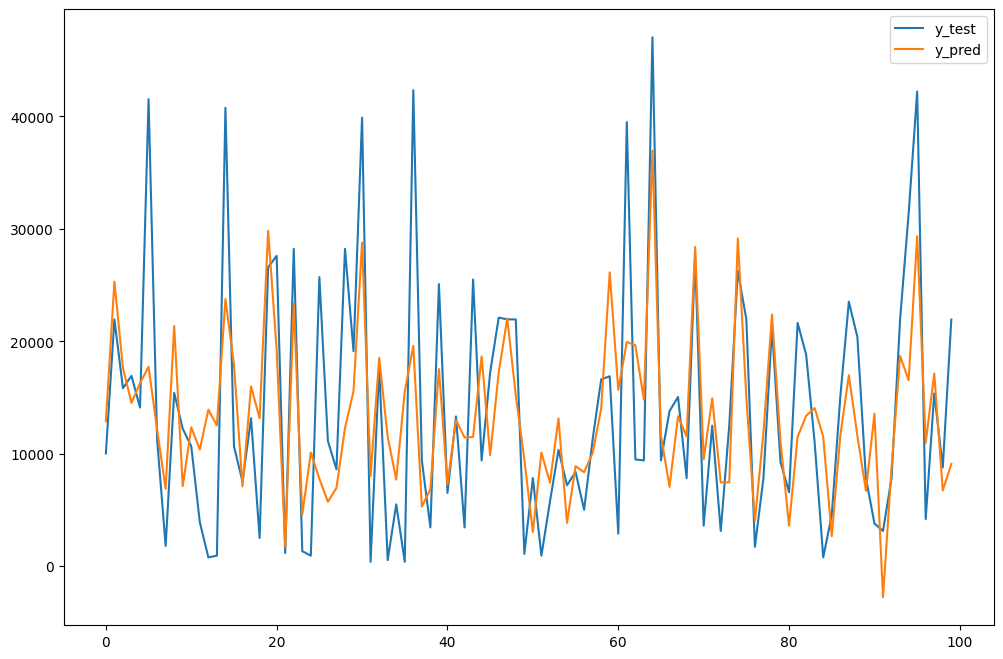

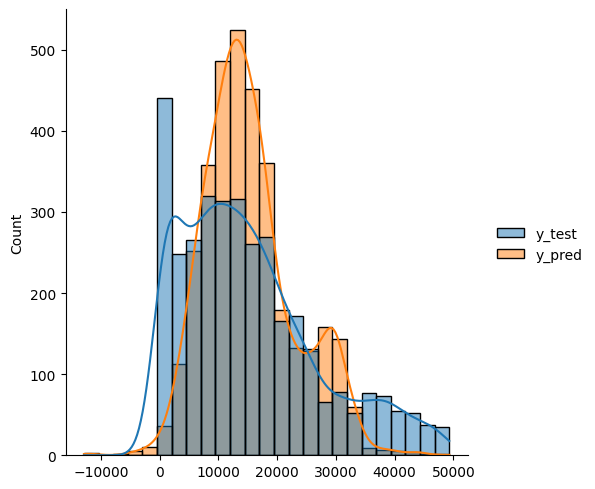

In [70]:
model_details(LinearRegression())

In [ ]:
# Dependent variables explain 48% of independent variable.
# KDE plot visualizes the distribution of observations in a dataset. From above, we can assume that the distribution is normalized.

# **Polynomial regression**

In [71]:
# Converter fits to data and transforms, finally it outputs the new polynomial data
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = polynomial_converter.fit_transform(X_prepared)

In [72]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, shuffle = True, random_state = 111)

In [73]:
# Model for fitting on polynomial Data
model_poly = LinearRegression(fit_intercept = True)
model_poly.fit(X_train, y_train)

LinearRegression()

In [74]:
# Model evaluation on test set
y_pred = model_poly.predict(X_test)
diff_poly = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
diff_poly.head()

y_test        y_pred
0  10036.0  11502.224422
1  21953.0  23378.057913
2  15837.0  17306.389687
3  16935.0  12441.467275
4  14113.0  18365.274423

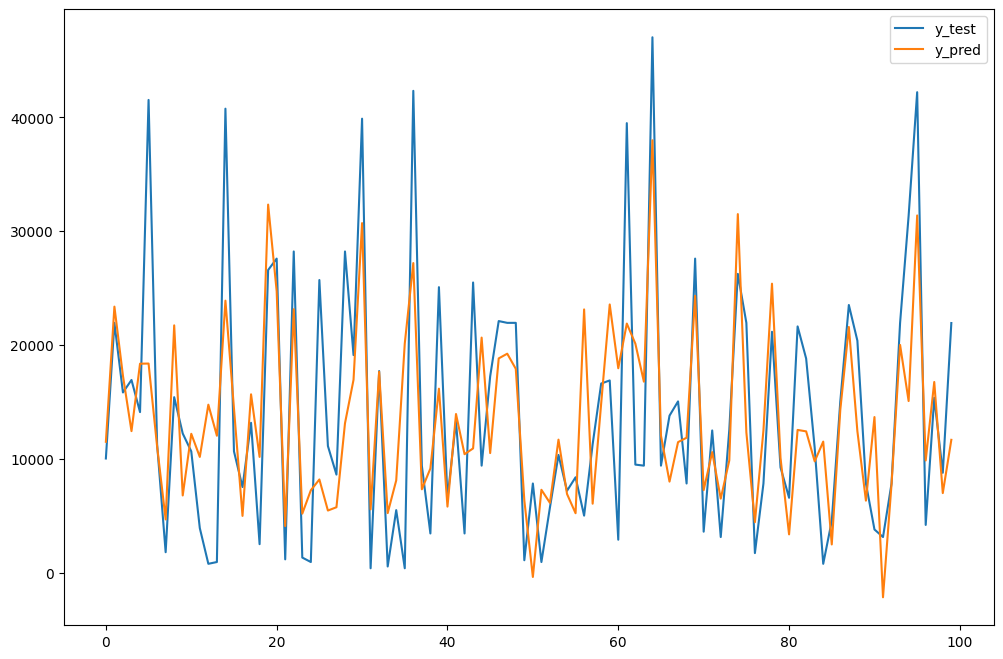

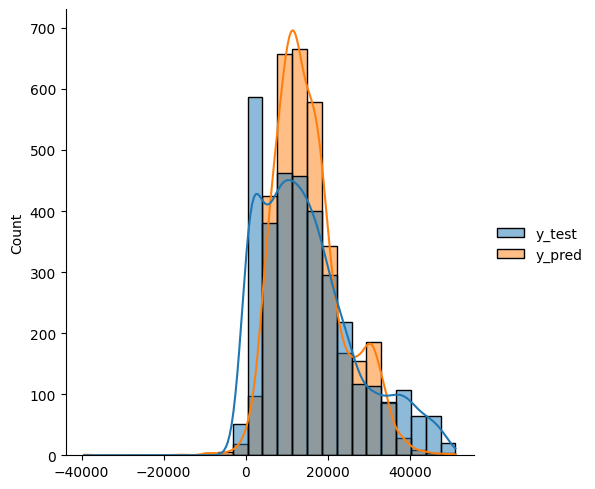

In [75]:
# Plot residuals
plt.figure(figsize=(12,8))
plt.plot(diff_poly[:100])
plt.legend(['y_test', 'y_pred'])
sns.displot(diff_poly, bins=25, kde=True)

In [76]:
# Statistics for chosen model
MAE = mae(y_test, y_pred)
MSE = mse(y_test ,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2(y_test, y_pred)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R2 :', R2)

MAE:  6129.309644423951
MSE:  68627006.69145331
RMSE:  8284.141880210243
R2 : 0.4957390176479711


In [ ]:
# Dependent variables explain 49% of independent variable.

In [77]:
# Adding results for final summary
name.append('PolynomialRegression()')
mae_det.append(MAE)
mse_det.append(MSE)
rmse_det.append(RMSE)
r2_det.append(R2)

# **Ridge Regression**

## Simple Ridge Regression

y_test        y_pred
0  10036.0  12891.689140
1  21953.0  25312.019271
2  15837.0  17635.649727
3  16935.0  14523.521962
4  14113.0  16283.835066


MAE:  6313.039724236567
MSE:  70477397.46019855
RMSE:  8395.081742317852
R2 : 0.48214262299567745


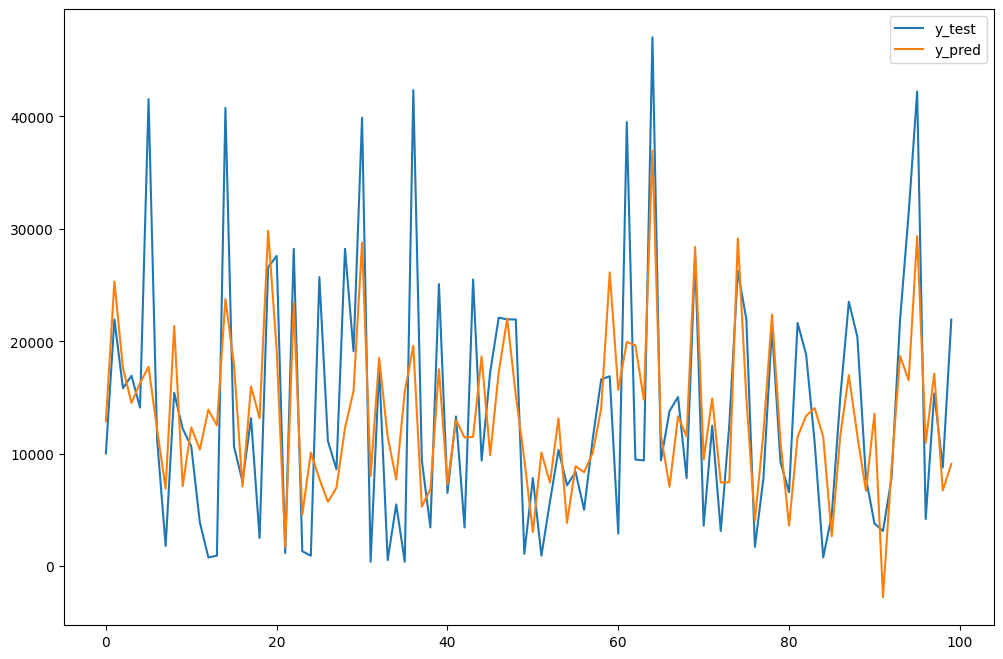

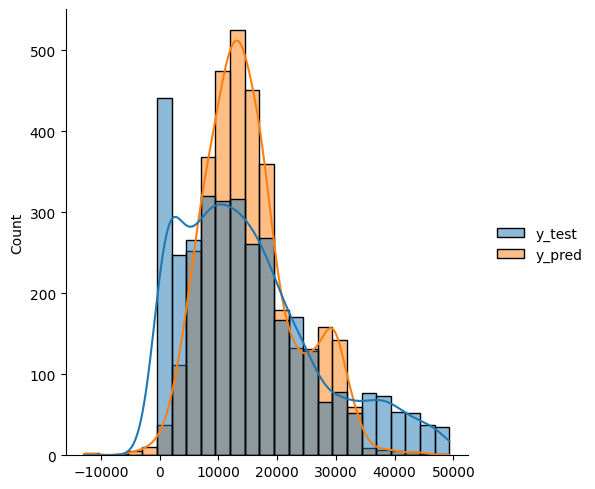

In [78]:
model_details(Ridge(alpha = 0.01))

In [ ]:
# Dependent variables explain 48% of independent variable.

## Ridge Regression with CV

y_test        y_pred
0  10036.0  12906.904036
1  21953.0  25458.242268
2  15837.0  17574.167240
3  16935.0  14516.691938
4  14113.0  16262.888639


MAE:  6305.614164689538
MSE:  70428044.73368306
RMSE:  8392.141844230415
R2 : 0.48250525944966627


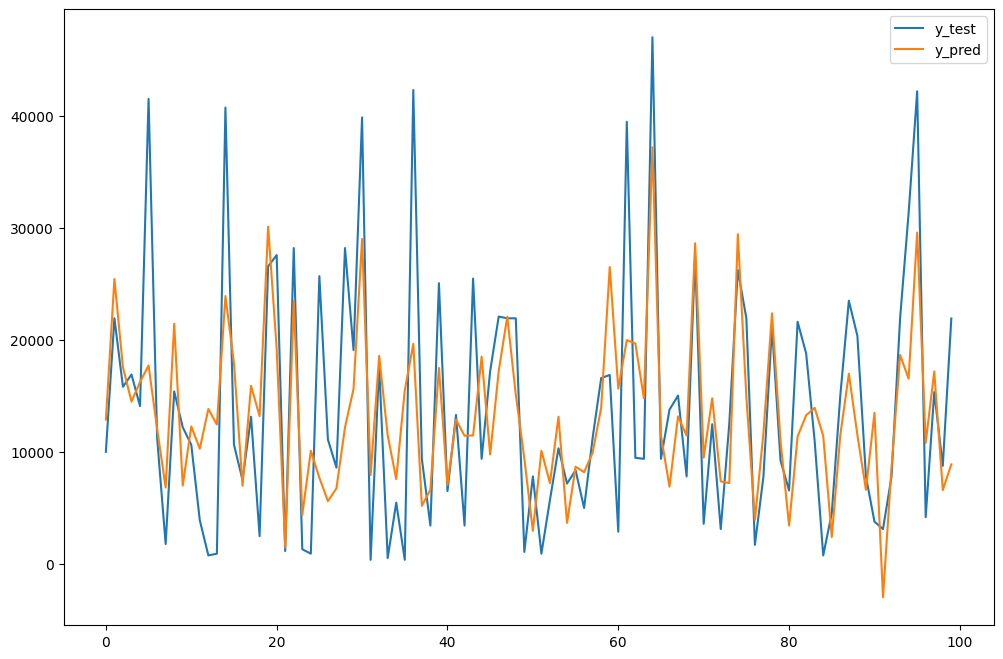

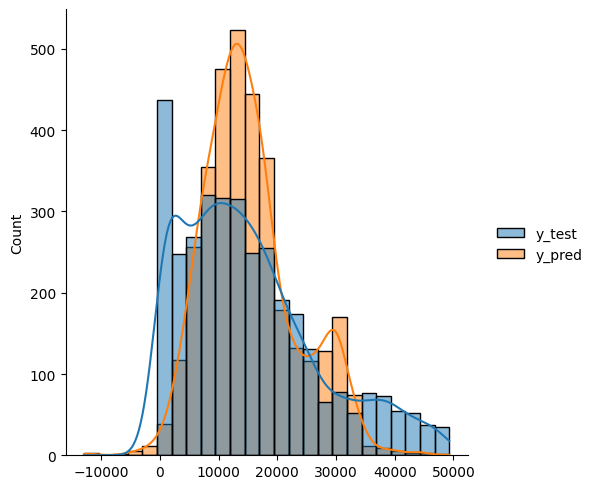

In [79]:
model_details(RidgeCV(alphas = (0.001, 0.01, 0.05), scoring='neg_mean_absolute_error'))

In [ ]:
# Dependent variables explain 48% of independent variable.

## Ridge Regression with cross_val_score

y_test        y_pred
0  10036.0  12891.689140
1  21953.0  25312.019271
2  15837.0  17635.649727
3  16935.0  14523.521962
4  14113.0  16283.835066


MAE:  6313.039724236567
MSE:  70477397.46019855
RMSE:  8395.081742317852
R2 : 0.48214262299567745


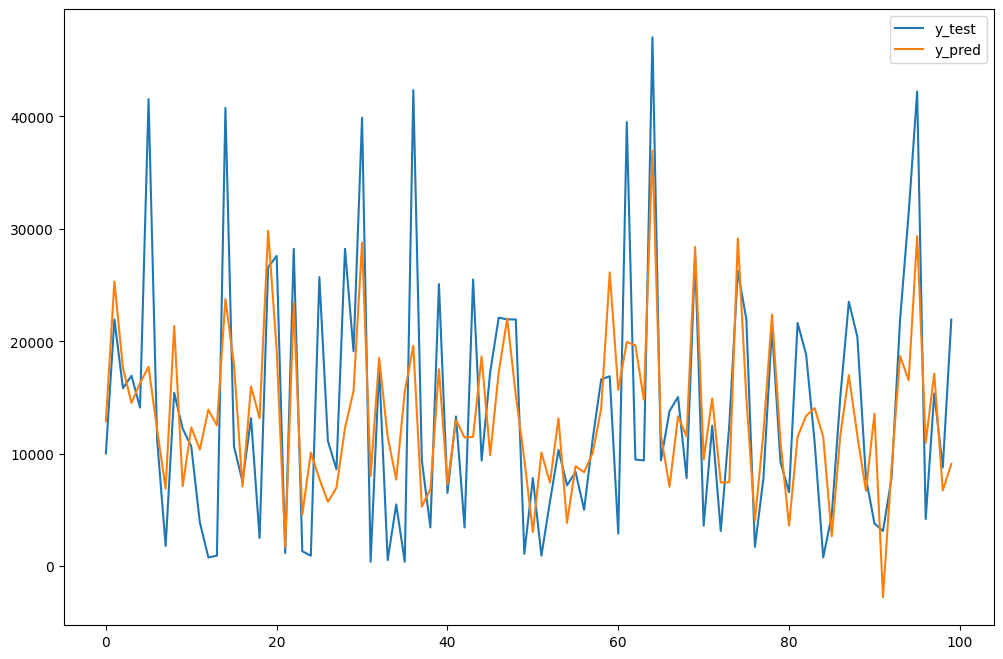

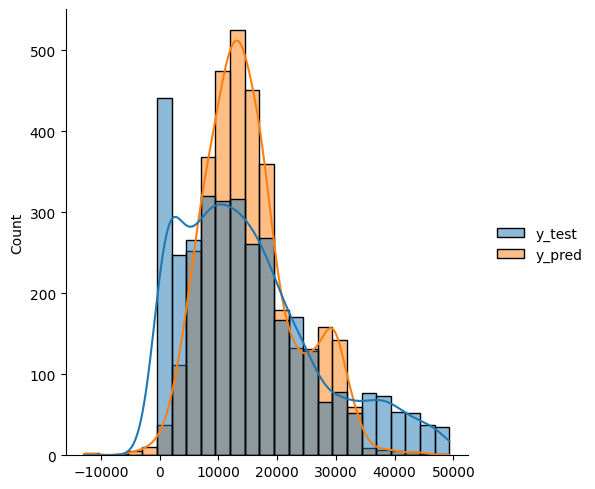

In [80]:
model_details(Ridge(alpha = 0.01), score = cross_val_score, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# Dependent variables explain 48% of independent variable.

## Ridge Regression with cross_validate

y_test        y_pred
0  10036.0  12891.689140
1  21953.0  25312.019271
2  15837.0  17635.649727
3  16935.0  14523.521962
4  14113.0  16283.835066


MAE:  6313.039724236567
MSE:  70477397.46019855
RMSE:  8395.081742317852
R2 : 0.48214262299567745


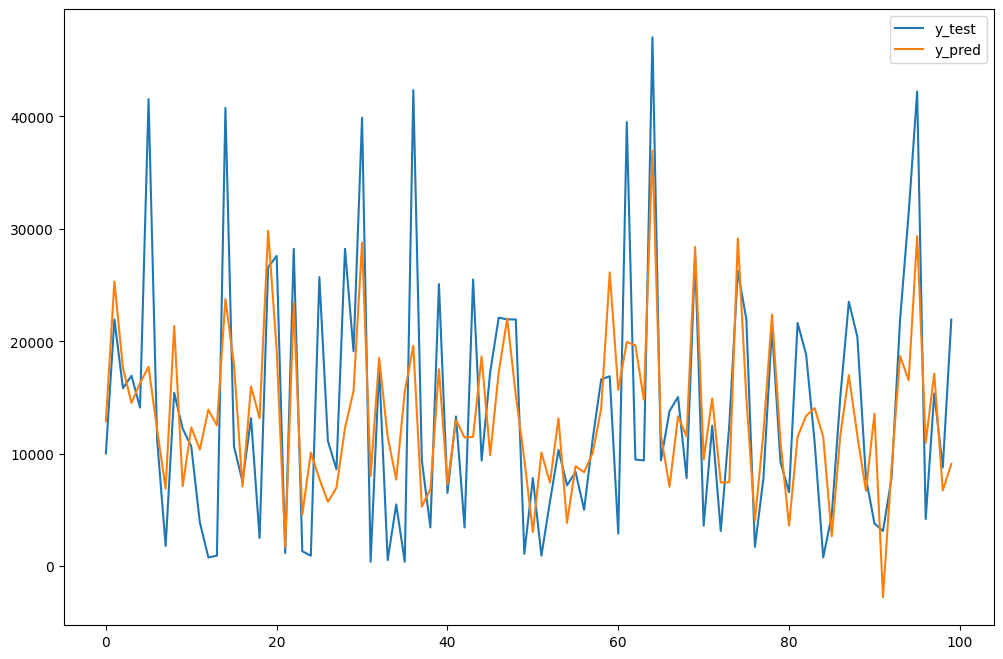

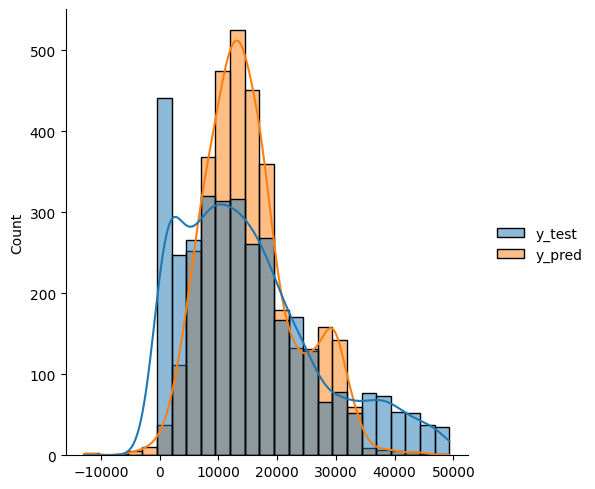

In [81]:
model_details(Ridge(alpha = 0.01), score = cross_validate, scoring = ['neg_mean_absolute_error','neg_mean_squared_error','max_error'], cv = 5)

In [ ]:
# Dependent variables explain 48% of independent variable.

## Ridge Regression with validation set

Statistics for validation set:
MAE for val:  6330.910255354054
MSE for val:  71171414.76283191
RMSE for val:  8436.31523609875
R2 for val: 0.4708082159844491


y_eval   y_pred_eval
0  17249.0  15634.086455
1   8154.0   5702.610671
2   8154.0   3490.154835
3   8467.0   7963.402775
4  28225.0  25049.787639


Statistics for test set:
MAE for test:  6398.622067907871
MSE for test:  72861923.59397997
RMSE for test:  8535.919610327874
R2 for test: 0.4619438948269914


y_test   y_pred_test
0  20385.0  12902.682225
1  25089.0  27113.255425
2   6586.0   2365.001504
3  11917.0  14246.405434
4   4077.0   4211.359135

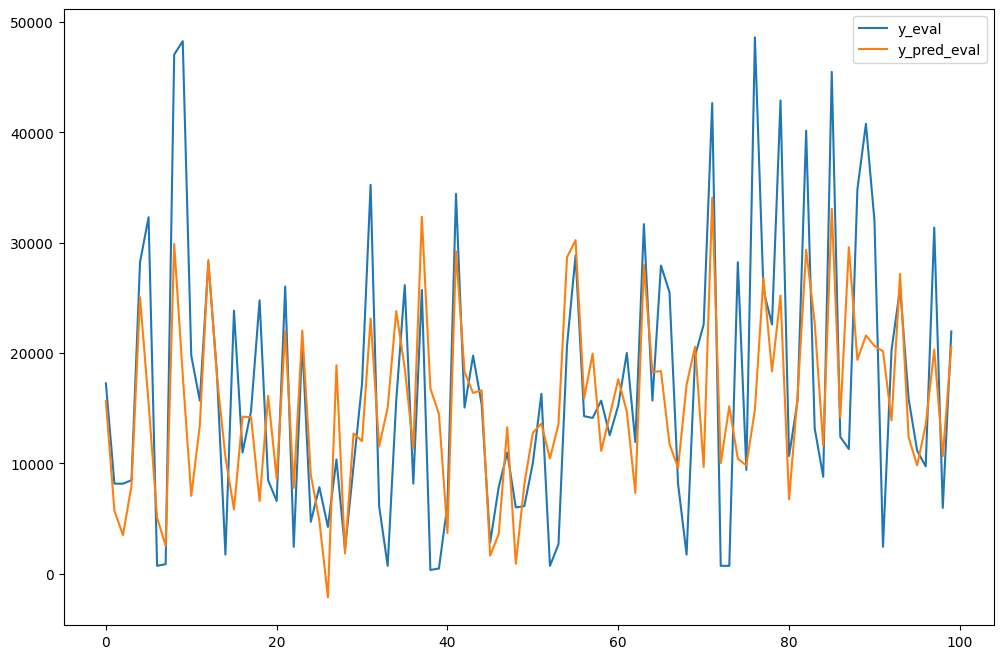

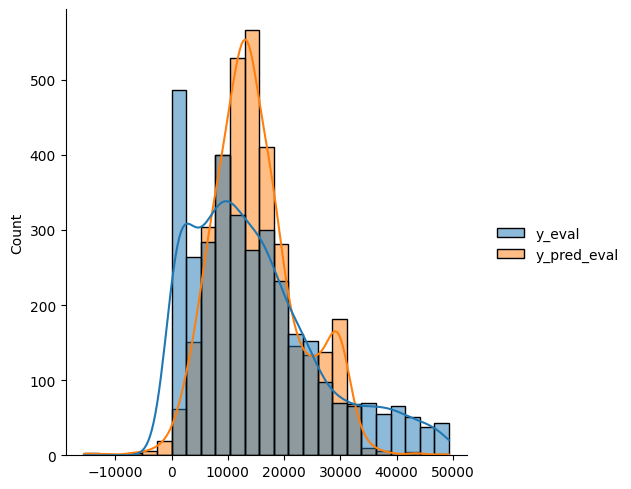

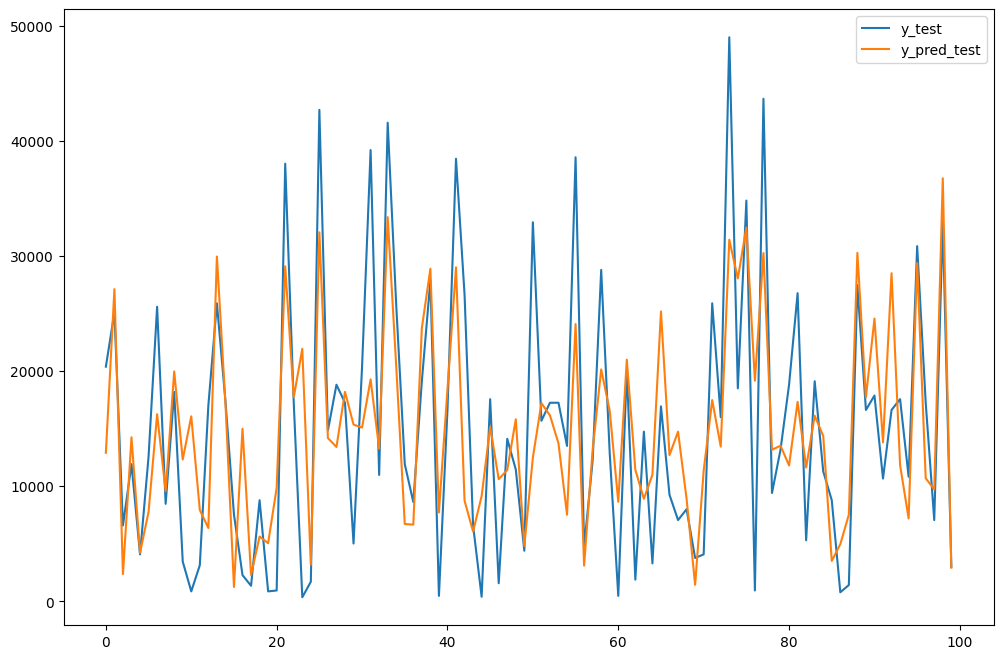

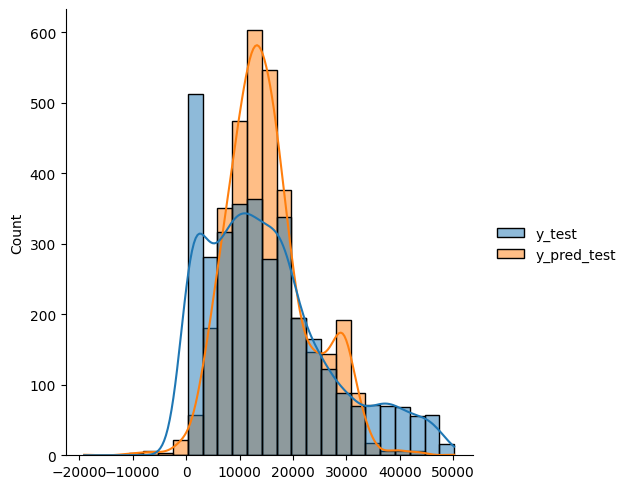

In [82]:
model_details_val_set(Ridge(alpha = 0.01))

In [ ]:
# The model has similar statistics results for validation and test sets.
# Dependent variables explain 47% of independent variable for validation set and 46% for test set.

## Ridge Regression with Grid Search

y_test        y_pred
0  10036.0  12883.388203
1  21953.0  25357.730382
2  15837.0  17597.829520
3  16935.0  14534.649803
4  14113.0  16296.103036


Best parameters are:
{'alpha': 0.5, 'fit_intercept': True, 'max_iter': 10, 'solver': 'auto', 'tol': 0.005}

MAE:  6311.645438933456
MSE:  70480488.27100505
RMSE:  8395.26582491615
R2 : 0.4821199121800862


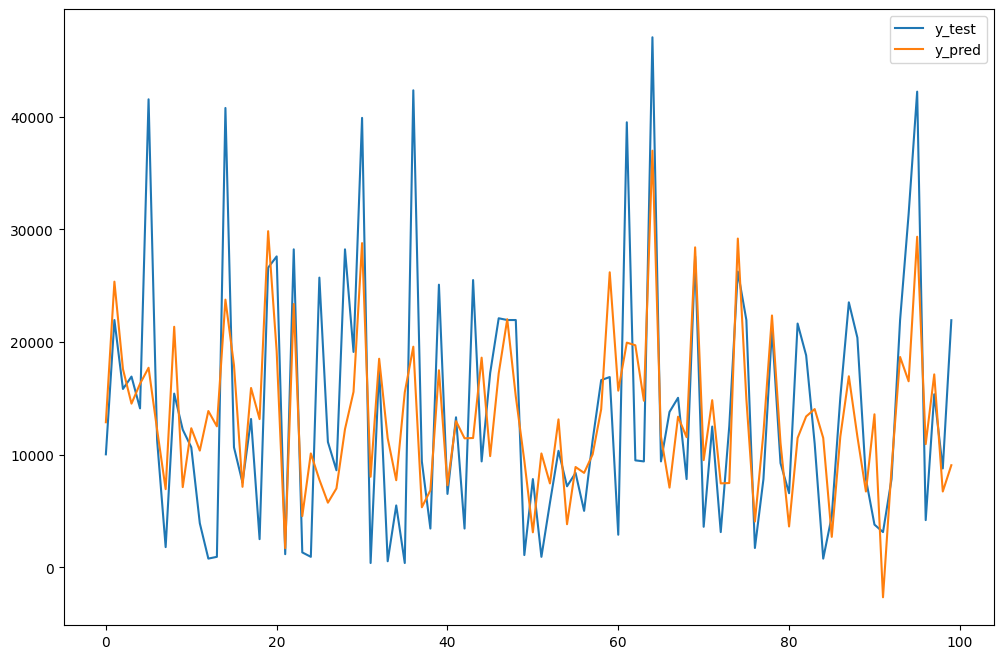

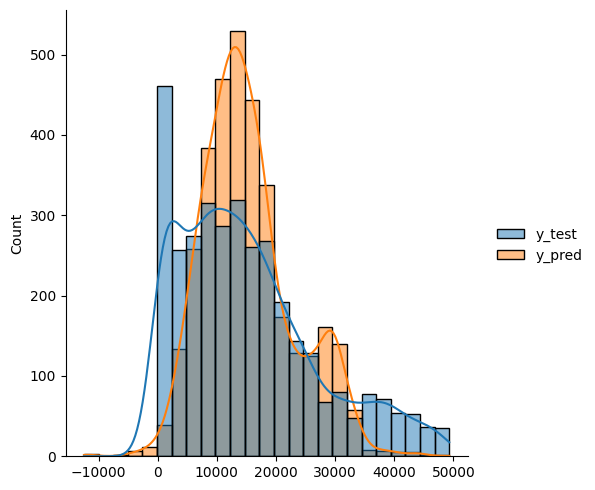

In [83]:
model_details(Ridge(), GridSearchCV, param_grid = {'alpha':[0.1,0.5,2,5,10,50,100], 'solver': ['auto', 'cholesky', 'lsqr'],
                                                                                               'max_iter': [10, 500, 1000], 'fit_intercept': [True, False], 'tol': [0.005, 0.5, 0.3]})

In [ ]:
# Dependent variables explain 48% of independent variable.

# **Lasso Regression**

## Simple Lasso Regression

y_test        y_pred
0  10036.0  12898.922331
1  21953.0  25428.491620
2  15837.0  17635.345012
3  16935.0  14552.619825
4  14113.0  16335.197119


MAE:  6311.631415204831
MSE:  70480644.17971621
RMSE:  8395.275110424685
R2 : 0.4821187665861919


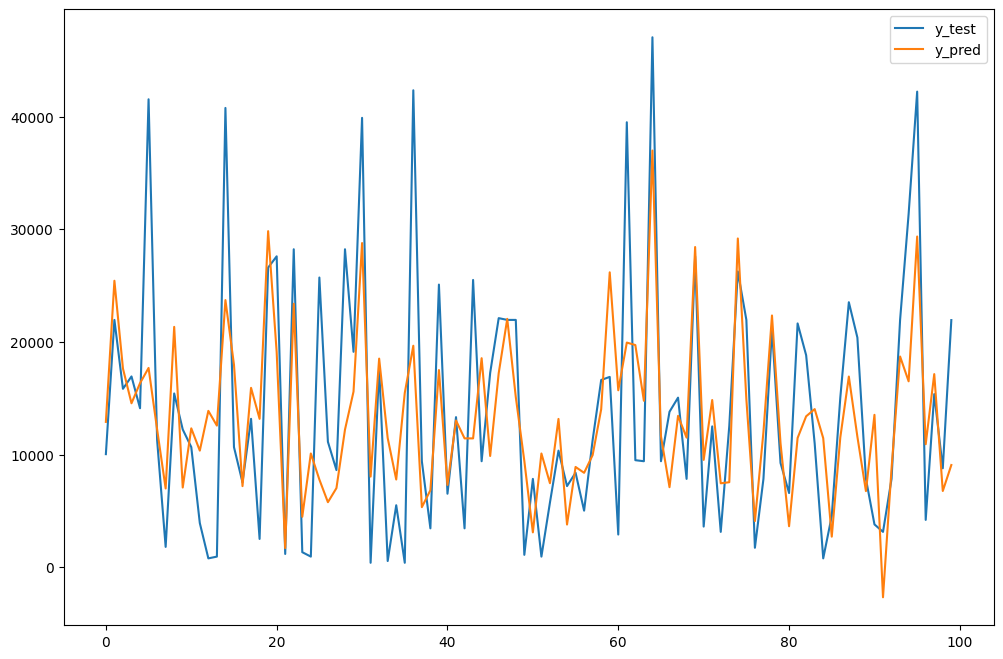

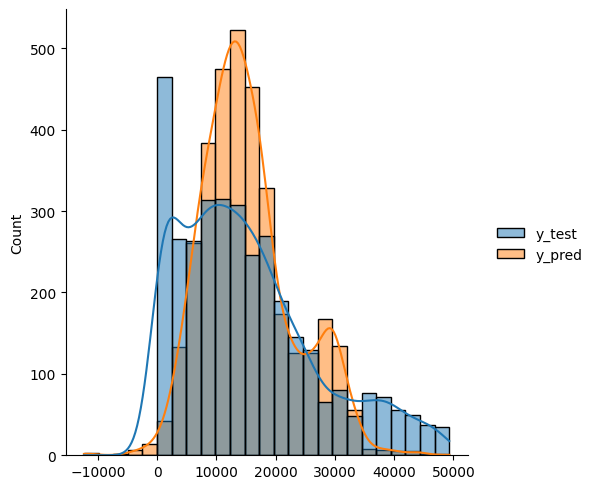

In [84]:
model_details(Lasso())

In [ ]:
# Dependent variables explain 48% of independent variable.

## Lasso Regression with CV

y_test        y_pred
0  10036.0  13106.192027
1  21953.0  24049.864145
2  15837.0  11530.708221
3  16935.0  16356.565117
4  14113.0  14243.671395


MAE:  6820.323109936452
MSE:  83517391.13725129
RMSE:  9138.784992396488
R2 : 0.3863266995208485


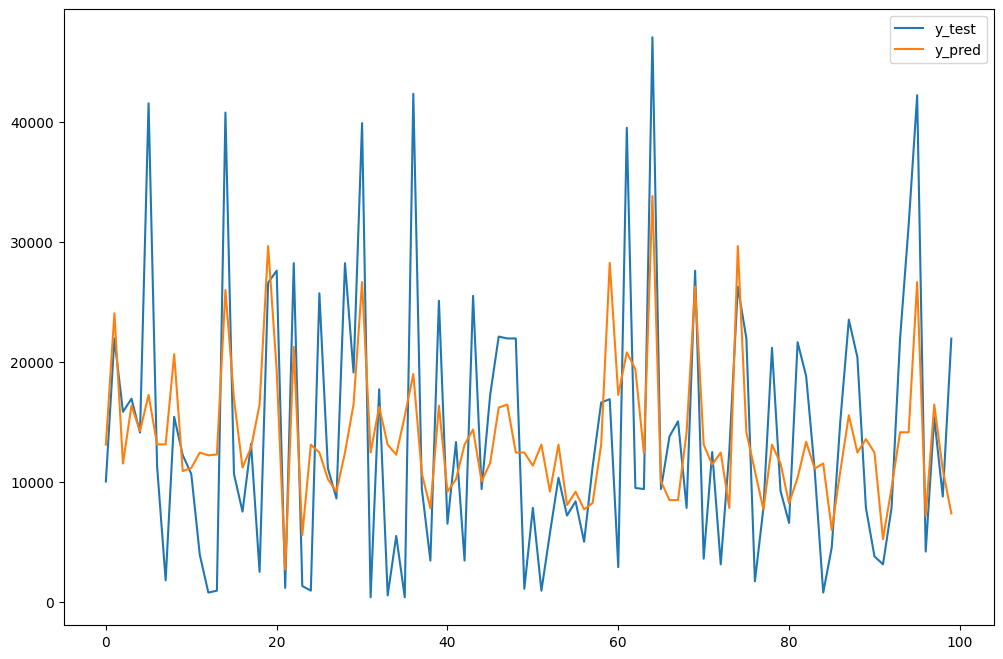

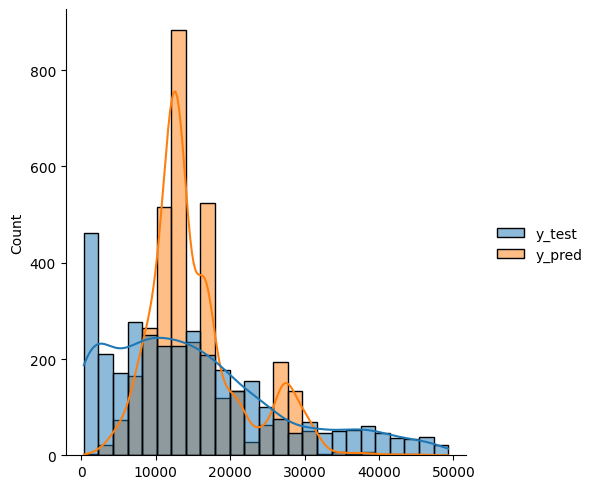

In [85]:
model_details(LassoCV(eps = 0.1, n_alphas = 100, cv=5))

In [ ]:
# Dependent variables explain 38% of independent variable.

## Lasso Regression with cross_val_score

y_test        y_pred
0  10036.0  12891.960853
1  21953.0  25312.193756
2  15837.0  17636.289962
3  16935.0  14523.488354
4  14113.0  16284.192639


MAE:  6312.700460937199
MSE:  70474926.7906442
RMSE:  8394.934591207022
R2 : 0.48216077710608685


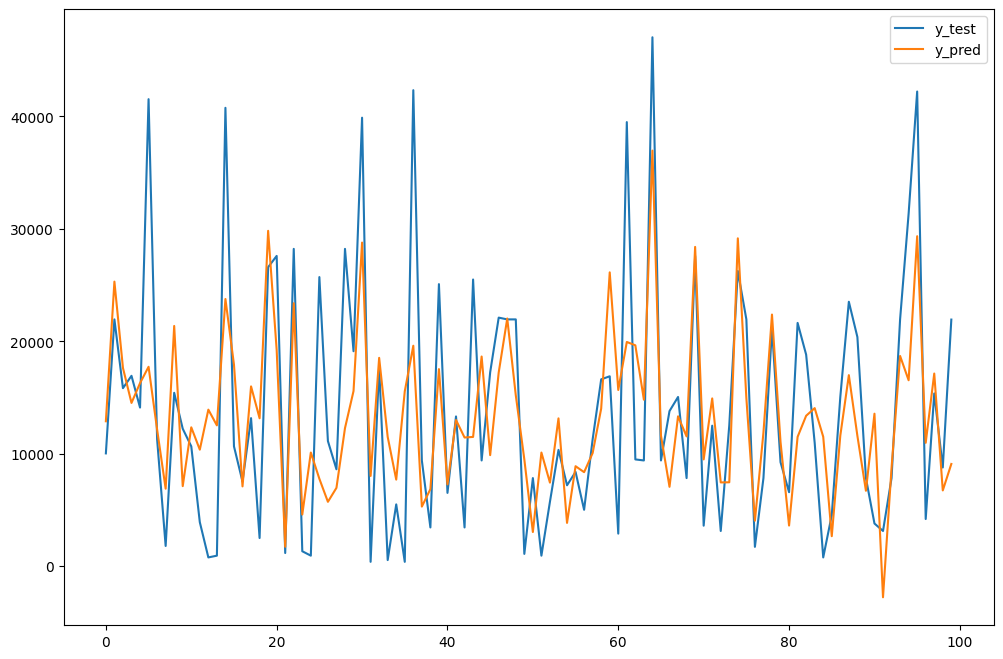

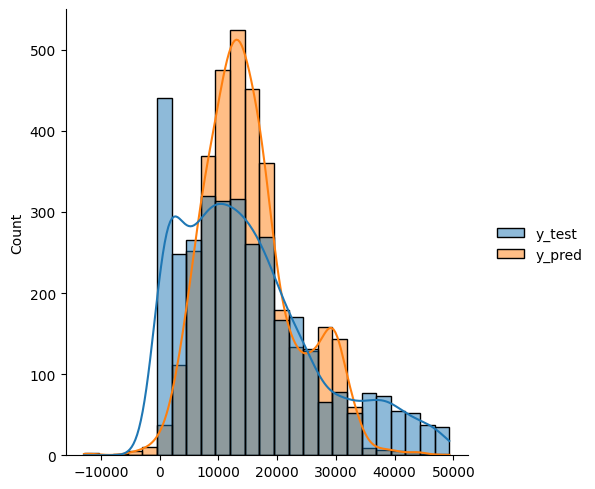

In [86]:
model_details(Lasso(alpha = 0.01,  tol = 0.1), score = cross_val_score, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# Dependent variables explain 48% of independent variable.

## Lasso Regression with cross_validate

y_test        y_pred
0  10036.0  12891.960853
1  21953.0  25312.193756
2  15837.0  17636.289962
3  16935.0  14523.488354
4  14113.0  16284.192639


MAE:  6312.700460937199
MSE:  70474926.7906442
RMSE:  8394.934591207022
R2 : 0.48216077710608685


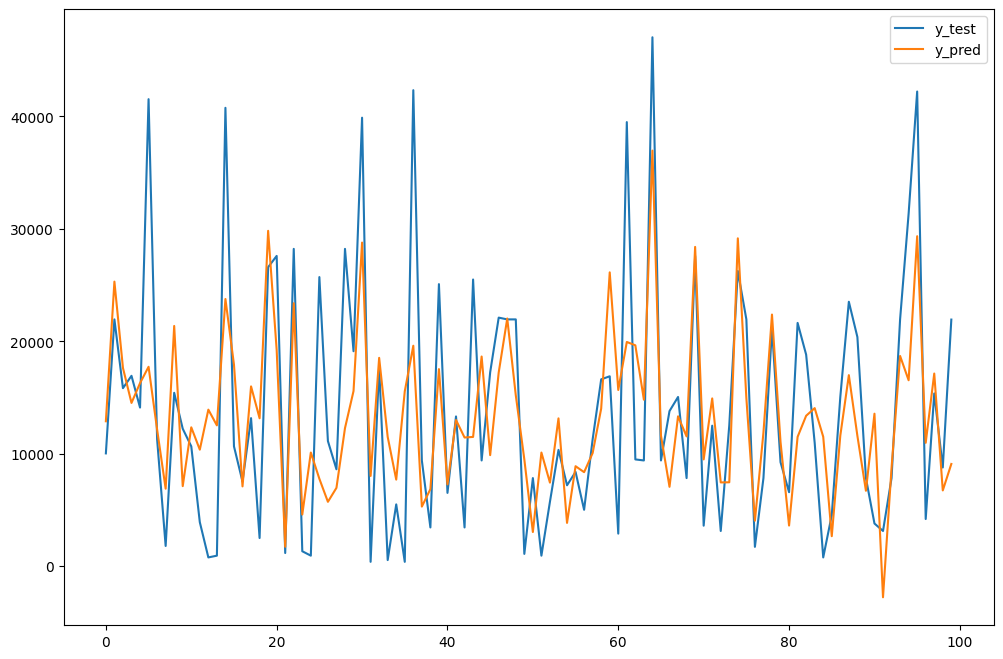

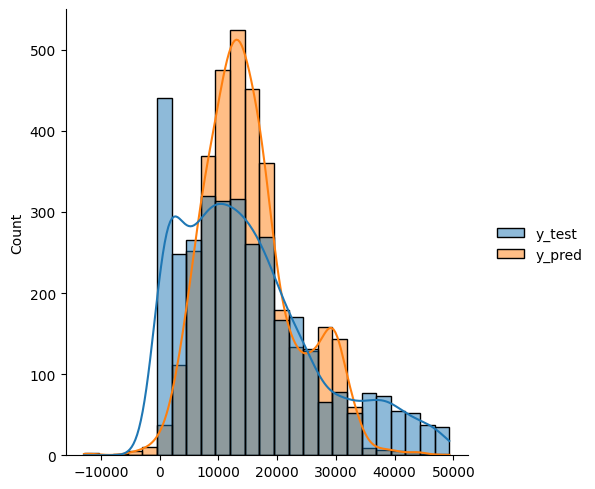

In [87]:
model_details(Lasso(alpha = 0.01, tol = 0.1), score = cross_validate, scoring = ['neg_mean_absolute_error','neg_mean_squared_error','max_error'], cv = 5)

In [ ]:
# Dependent variables explain 48% of independent variable.

## Lasso Regression with validation set

Statistics for validation set:
MAE for val:  6330.956433691763
MSE for val:  71171736.62211813
RMSE for val:  8436.33431189863
R2 for val: 0.47080582281451633


y_eval   y_pred_eval
0  17249.0  15634.328708
1   8154.0   5702.597887
2   8154.0   3488.548829
3   8467.0   7961.743974
4  28225.0  25048.506250


Statistics for test set:
MAE for test:  6398.312631274335
MSE for test:  72859980.07561828
RMSE for test:  8535.805766043313
R2 for test: 0.4619582469311967


y_test   y_pred_test
0  20385.0  12902.784045
1  25089.0  27113.667163
2   6586.0   2363.380831
3  11917.0  14246.090985
4   4077.0   4210.495376

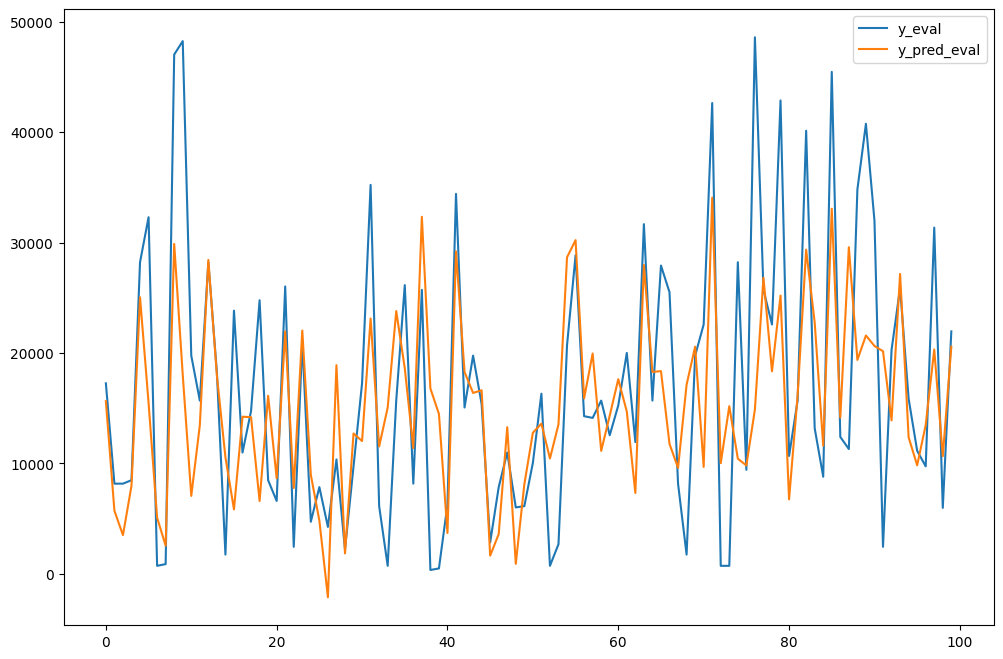

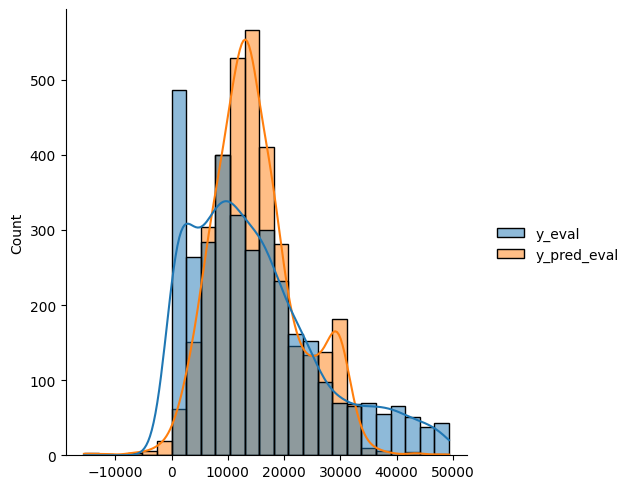

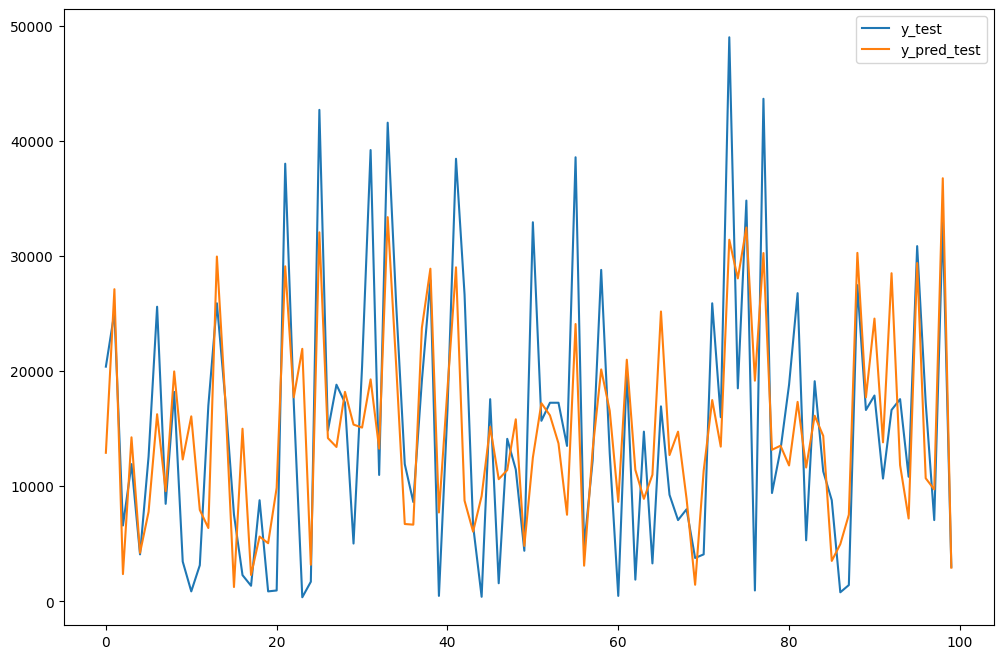

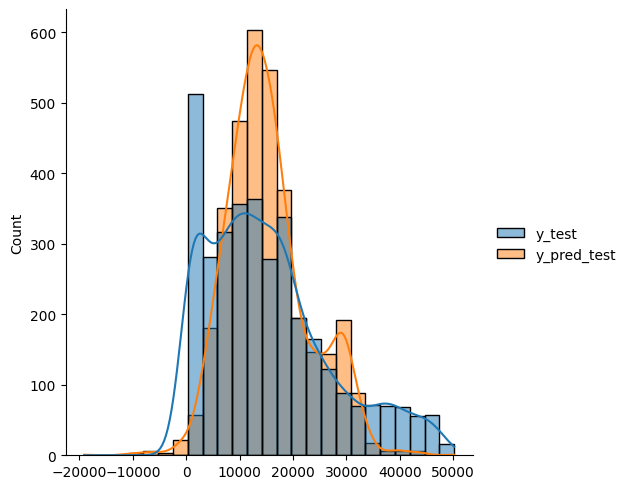

In [88]:
model_details_val_set(Lasso(alpha = 0.01, tol = 0.1))

In [ ]:
# The model has similar statistics results for validation and test sets.
# Dependent variables explain 47% of independent variable for validation set and 46% for test set.

## Lasso Regression with Grid Search

Fitting 5 folds for each of 6 candidates, totalling 30 fits


y_test        y_pred
0  10036.0  12901.380016
1  21953.0  25428.797504
2  15837.0  17624.340432
3  16935.0  14544.204460
4  14113.0  16345.623047


Best parameters are:
{'alpha': 1}

MAE:  6312.375922808378
MSE:  70486657.52491622
RMSE:  8395.63324144857
R2 : 0.4820745814249272


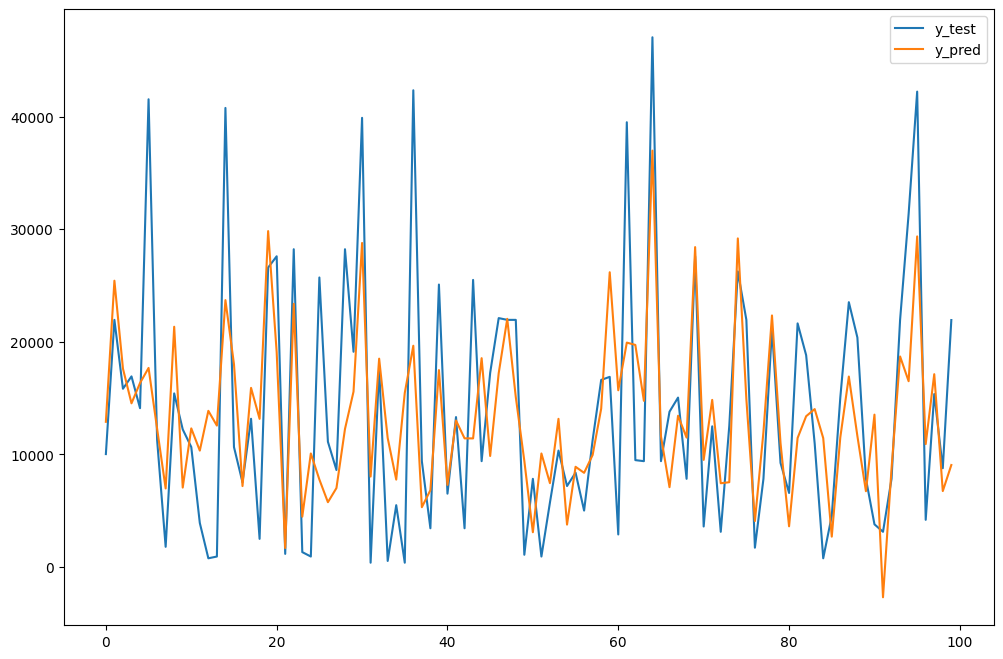

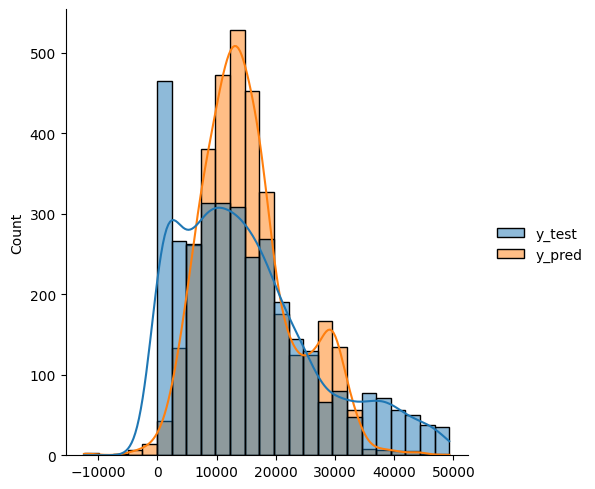

In [89]:
model_details(Lasso(tol = 0.1), GridSearchCV, scoring = 'neg_mean_squared_error', cv = 5, param_grid = {'alpha':[0.1,1,5,10,50,100]}, verbose = 1)

In [ ]:
# Dependent variables explain 48% of independent variable.

# **Elastic Net**

## Simple ElasticNet

y_test        y_pred
0  10036.0  12435.767406
1  21953.0  25662.503423
2  15837.0  11806.290990
3  16935.0  16097.263510
4  14113.0  15022.798362


MAE:  6548.230051512429
MSE:  78963467.95832768
RMSE:  8886.139091772517
R2 : 0.419788246023731


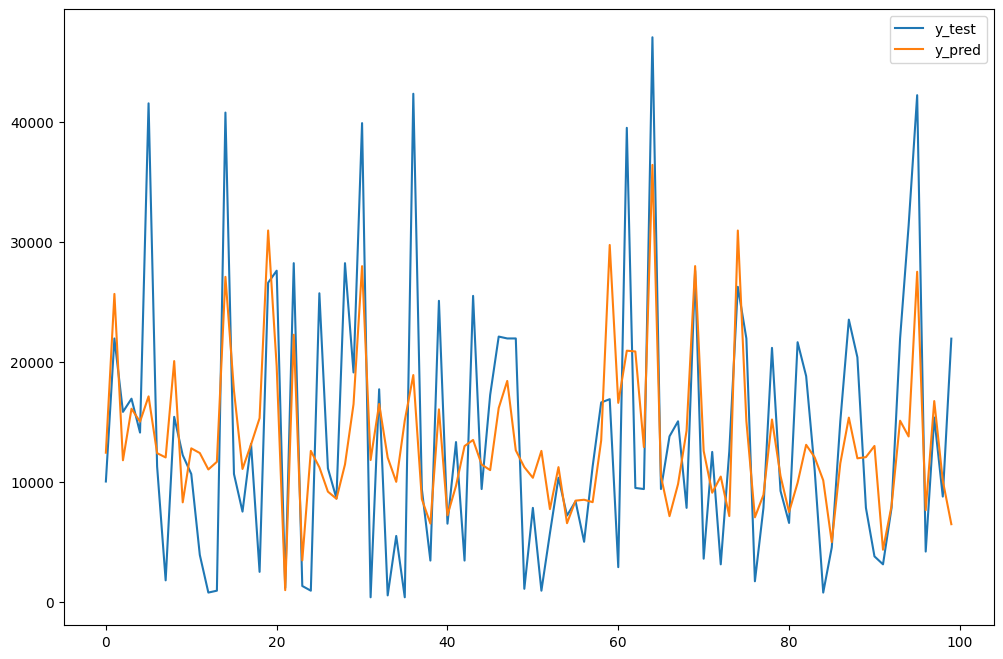

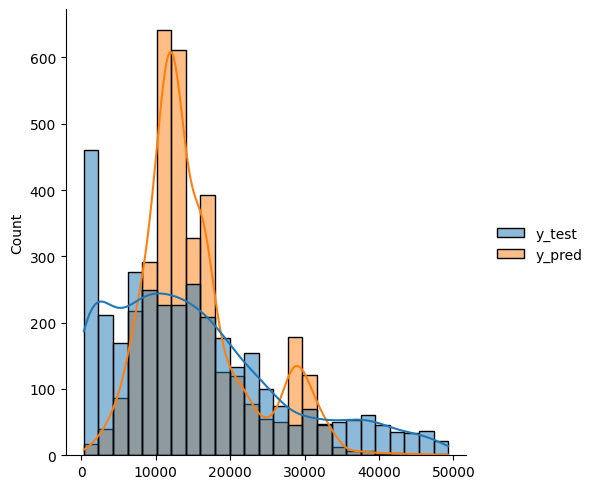

In [90]:
model_details(ElasticNet())

In [ ]:
# Dependent variables explain 42% of independent variable.

## Elastic Net with CV

y_test        y_pred
0  10036.0  12994.714214
1  21953.0  26191.028062
2  15837.0  17128.675402
3  16935.0  14838.716784
4  14113.0  15845.316102


MAE:  6293.586231703508
MSE:  70975694.32903971
RMSE:  8424.707373496109
R2 : 0.4784812121211729


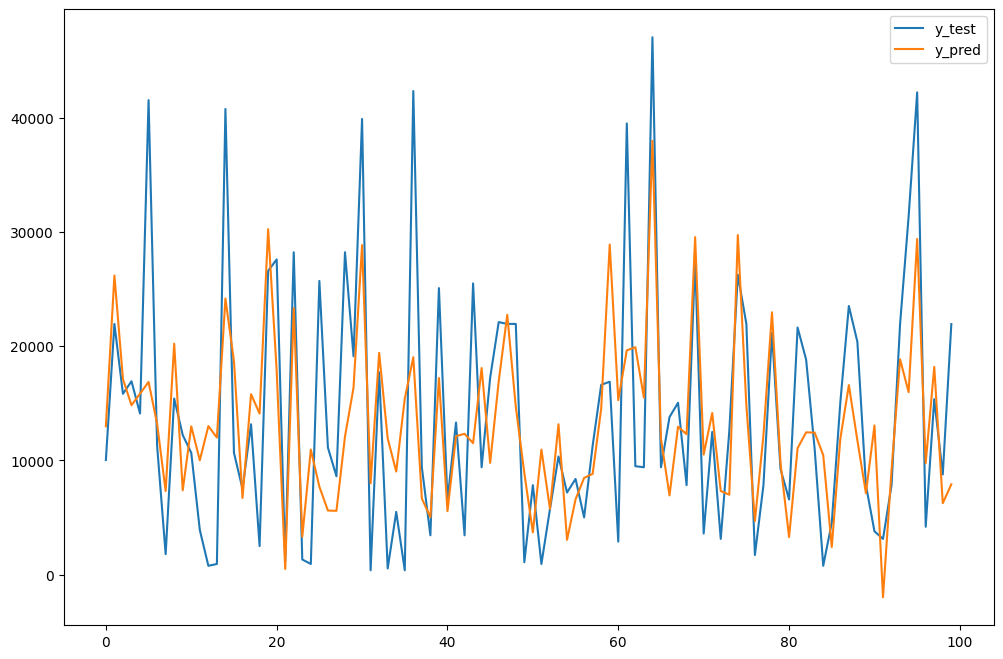

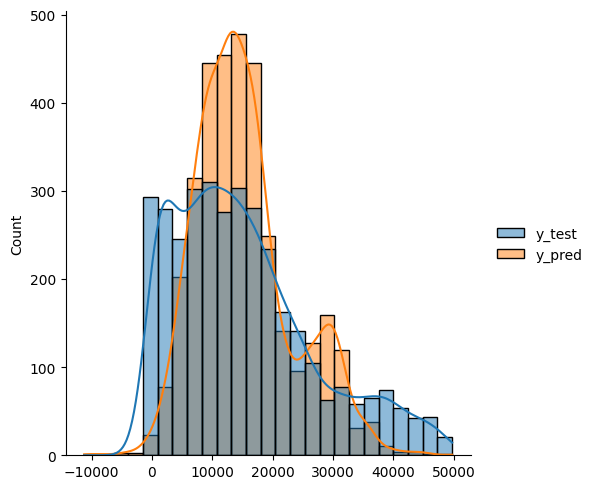

In [91]:
model_details(ElasticNetCV(alphas = (0.001, 0.01, 0.05), tol = 0.3))

In [ ]:
# Dependent variables explain 48% of independent variable.

## Elastic Net with cross_val_score

y_test        y_pred
0  10036.0  12983.666629
1  21953.0  25742.315425
2  15837.0  14998.150421
3  16935.0  14945.036069
4  14113.0  16148.959148


MAE:  6329.344578956907
MSE:  72454140.46667624
RMSE:  8511.999792450435
R2 : 0.46761781099585475


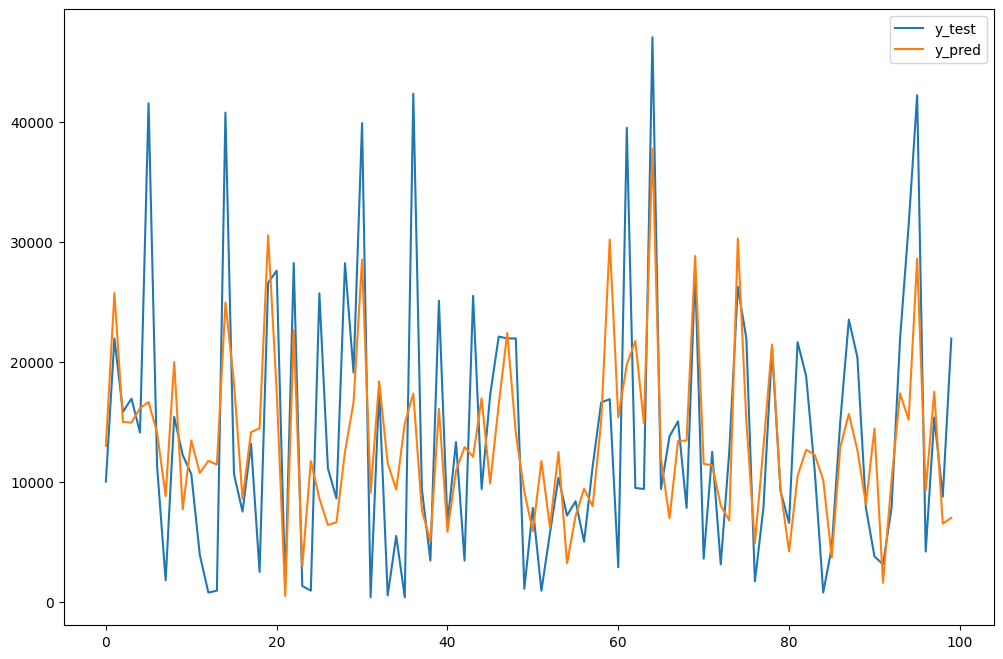

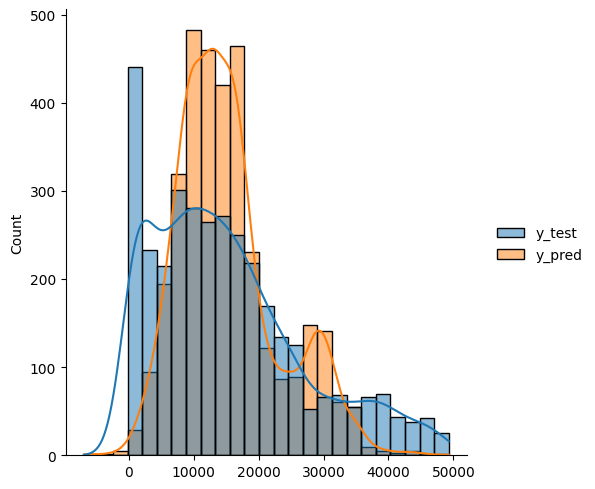

In [92]:
model_details(ElasticNet(alpha = 0.01,  tol = 0.3), score = cross_val_score, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# Dependent variables explain 47% of independent variable.

## Elastic Net with cross_validate

y_test        y_pred
0  10036.0  12625.011962
1  21953.0  25377.384385
2  15837.0  14952.275385
3  16935.0  14956.636454
4  14113.0  16858.241470


MAE:  6335.9008339223565
MSE:  72273317.56331465
RMSE:  8501.37151072194
R2 : 0.46894647064861816


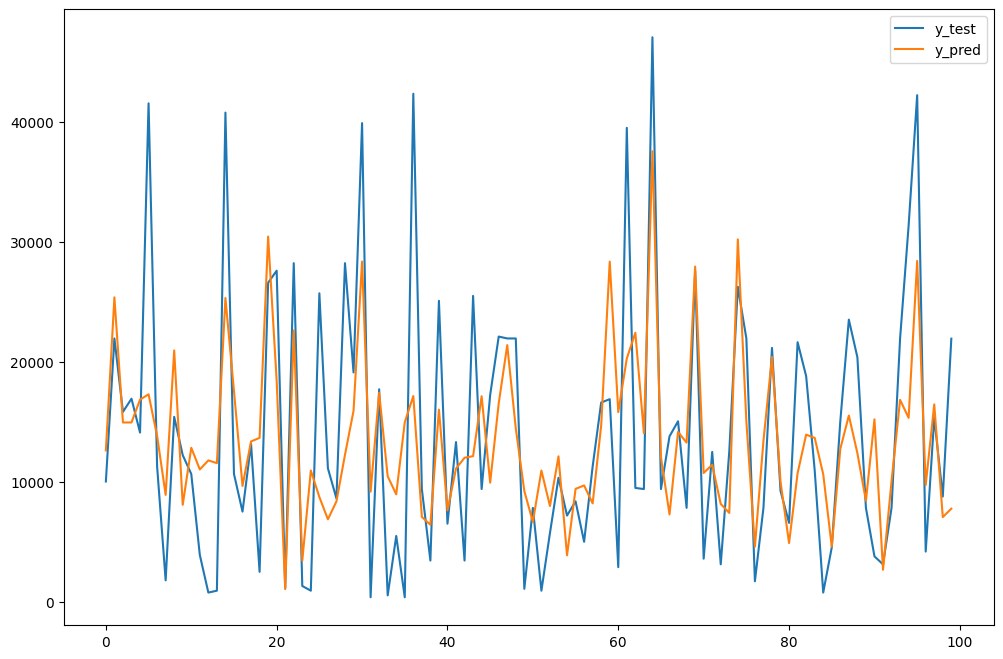

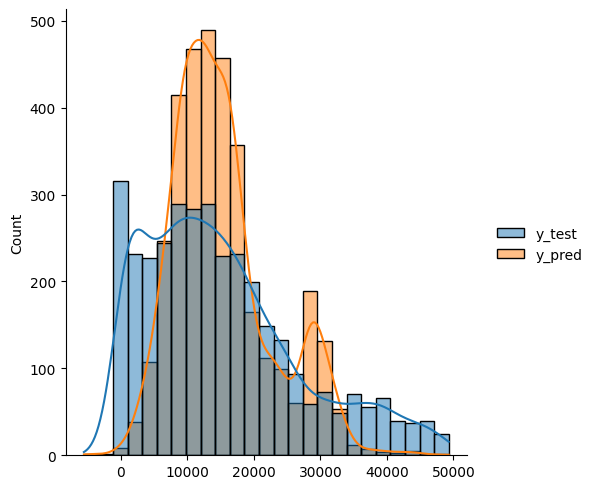

In [93]:
model_details(ElasticNet(alpha = 0.01, tol = 0.1), score = cross_validate, scoring = ['neg_mean_absolute_error','neg_mean_squared_error','max_error'], cv = 5)

In [ ]:
# Dependent variables explain 47% of independent variable.

## Elastic Net with validation set

Statistics for validation set:
MAE for val:  6330.454886721595
MSE for val:  72662295.14976376
RMSE for val:  8524.218154749664
R2 for val: 0.459722843376031


y_eval   y_pred_eval
0  17249.0  14498.569567
1   8154.0   5959.147758
2   8154.0   5946.850766
3   8467.0  11513.928216
4  28225.0  25295.285157


Statistics for test set:
MAE for test:  6395.160294991668
MSE for test:  74420196.77430606
RMSE for test:  8626.714135422946
R2 for test: 0.4504366718929117


y_test   y_pred_test
0  20385.0  12345.549764
1  25089.0  25946.354876
2   6586.0   6282.876057
3  11917.0  14088.509903
4   4077.0   6333.635213

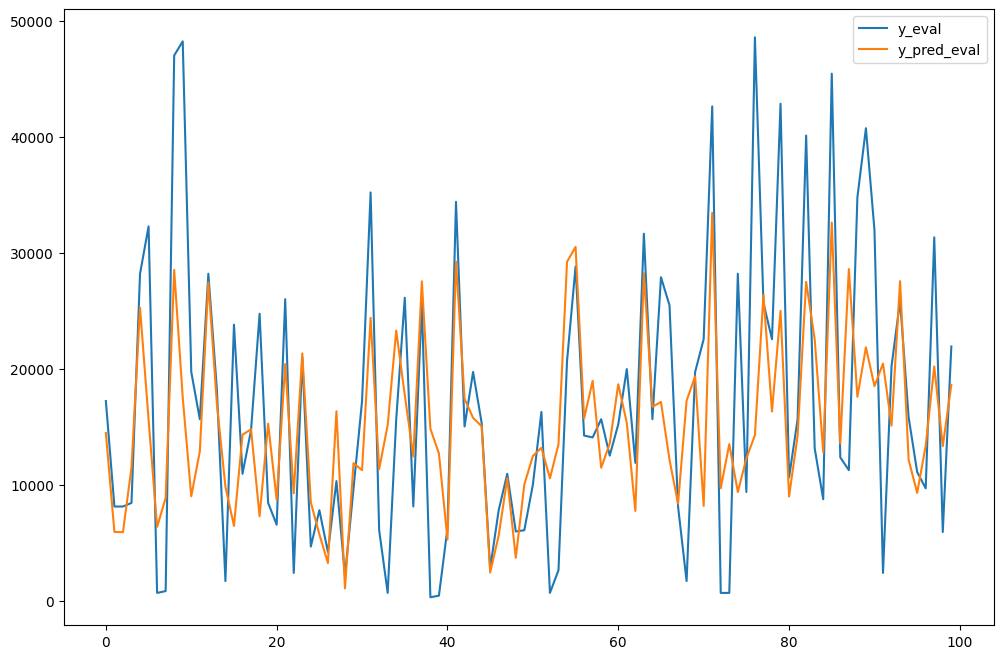

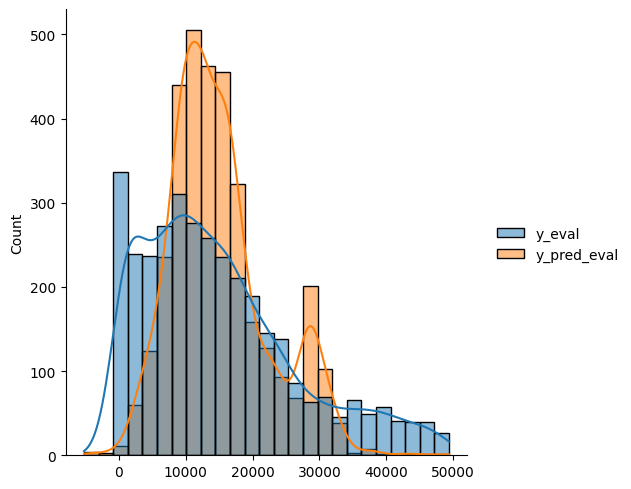

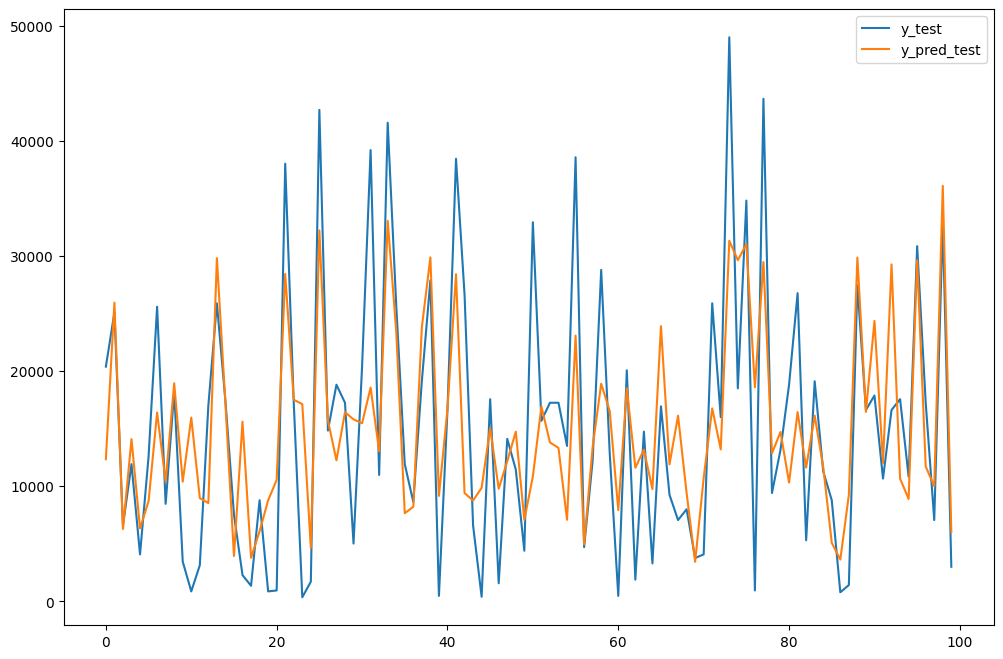

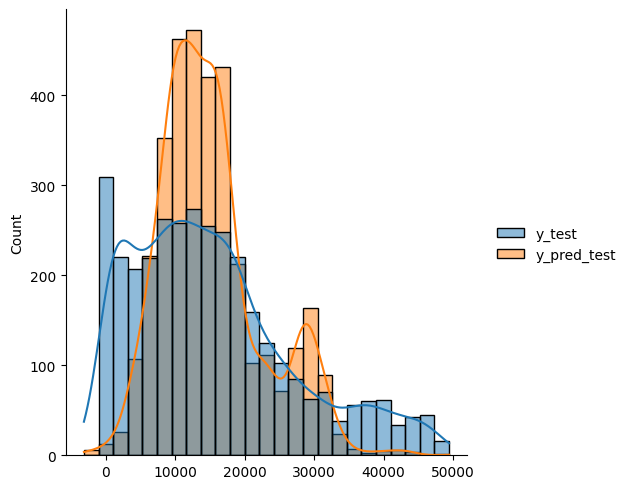

In [94]:
model_details_val_set(ElasticNet(alpha = 0.01, tol = 0.1))

In [ ]:
# The model has similar statistics results for validation and test sets.
# Dependent variables explain 46% of independent variable for validation set and 45% for test set.

## Elastic Net with Grid Search

Fitting 5 folds for each of 6 candidates, totalling 30 fits


y_test        y_pred
0  10036.0  12380.995887
1  21953.0  25261.889646
2  15837.0  12626.649564
3  16935.0  15396.664815
4  14113.0  16592.410410


Best parameters are:
{'alpha': 0.1}

MAE:  6435.331409884545
MSE:  75300284.6131412
RMSE:  8677.573659332498
R2 : 0.4467047694338855


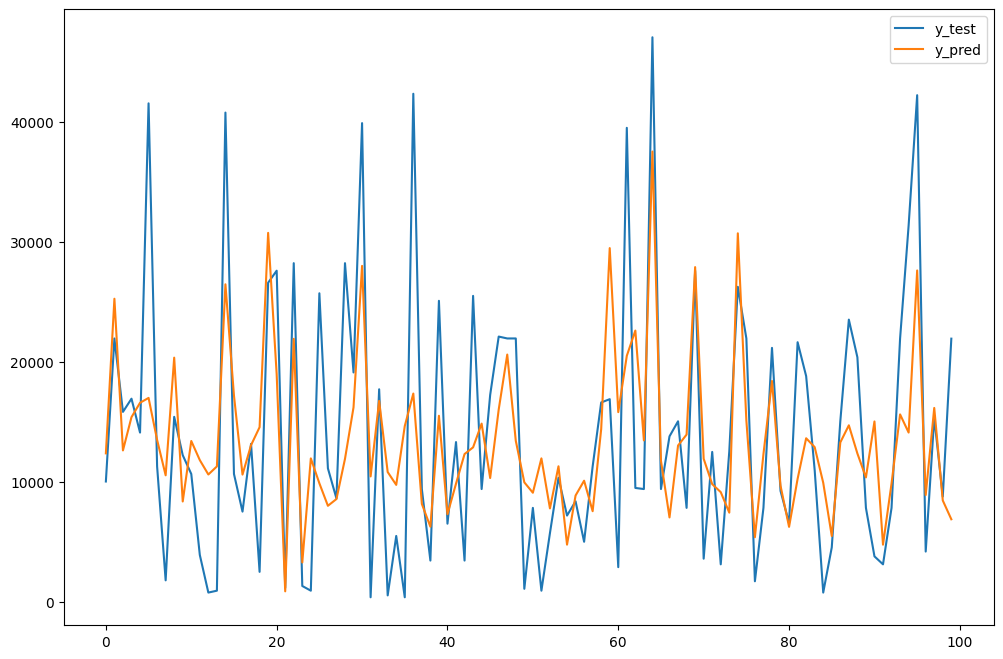

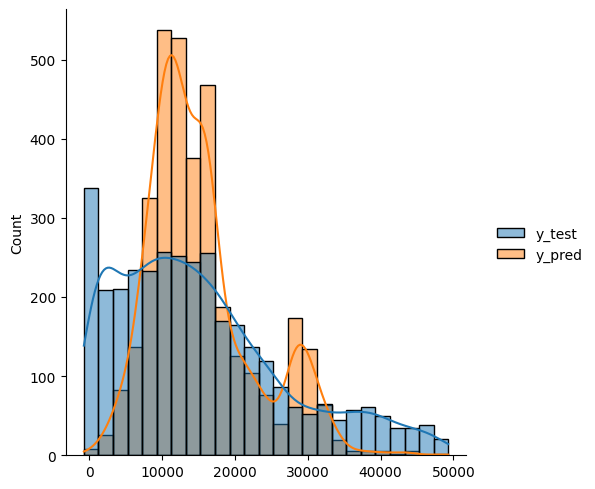

In [95]:
model_details(ElasticNet(tol = 0.1), GridSearchCV, scoring = 'neg_mean_squared_error', cv = 5, param_grid = {'alpha':[0.1,1,5,10,50,100]}, verbose = 1)

In [ ]:
# Dependent variables explain 45% of independent variable.

# **Summary**

In [96]:
summary = pd.DataFrame()
summary['Name'] = name
summary['MAE'] = mae_det
summary['MSE'] = mse_det
summary['RMSE'] = rmse_det
summary['R2'] = r2_det
summary

Name          MAE  \
0                                  LinearRegression()  6313.069986   
1                              PolynomialRegression()  6129.309644   
2                                   Ridge(alpha=0.01)  6313.039724   
3   RidgeCV(alphas=(0.001, 0.01, 0.05), scoring='n...  6305.614165   
4                                   Ridge(alpha=0.01)  6313.039724   
5                                   Ridge(alpha=0.01)  6313.039724   
6                                   Ridge(alpha=0.01)  6398.622068   
7   GridSearchCV(estimator=Ridge(),\n             ...  6311.645439   
8                                             Lasso()  6311.631415   
9                              LassoCV(cv=5, eps=0.1)  6820.323110   
10                         Lasso(alpha=0.01, tol=0.1)  6312.700461   
11                         Lasso(alpha=0.01, tol=0.1)  6312.700461   
12                         Lasso(alpha=0.01, tol=0.1)  6398.312631   
13  GridSearchCV(cv=5, estimator=Lasso(tol=0.1),\n...  6312.375923   
14                                       ElasticNet()  6548.230052   
15  ElasticNetCV(alphas=(0.001, 0.01, 0.05), tol=0.3)  6293.586232   
16                    ElasticNet(alpha=0.01, tol=0.3)  6329.344579   
17                    ElasticNet(alpha=0.01, tol=0.1)  6335.900834   
18                    ElasticNet(alpha=0.01, tol=0.1)  6395.160295   
19  GridSearchCV(cv=5, estimator=ElasticNet(tol=0....  6435.331410   

             MSE         RMSE        R2  
0   7.047736e+07  8395.079515  0.482143  
1   6.862701e+07  8284.141880  0.495739  
2   7.047740e+07  8395.081742  0.482143  
3   7.042804e+07  8392.141844  0.482505  
4   7.047740e+07  8395.081742  0.482143  
5   7.047740e+07  8395.081742  0.482143  
6   7.286192e+07  8535.919610  0.461944  
7   7.048049e+07  8395.265825  0.482120  
8   7.048064e+07  8395.275110  0.482119  
9   8.351739e+07  9138.784992  0.386327  
10  7.047493e+07  8394.934591  0.482161  
11  7.047493e+07  8394.934591  0.482161  
12  7.285998e+07  8535.805766  0.461958  
13  7.048666e+07  8395.633241  0.482075  
14  7.896347e+07  8886.139092  0.419788  
15  7.097569e+07  8424.707373  0.478481  
16  7.245414e+07  8511.999792  0.467618  
17  7.227332e+07  8501.371511  0.468946  
18  7.442020e+07  8626.714135  0.450437  
19  7.530028e+07  8677.573659  0.446705

In [ ]:
# To sum up - the best model (in respect of R2 value) is the second one - Polynomial Regression with degree of 2.
# The worst model has alomost 10% worse R2 value (LassoCV - tenth model).